In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [3]:
df = pd.read_csv("loan_data.csv")
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [4]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [5]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [7]:
# Rename the columns 
df.columns = ['age', 'gender', 'education', 'income',
       'emp_exp', 'home', 'amnt', 'intent',
       'rate', 'percentage', 'cred_hist',
       'score', 'defaults', 'status']
df.columns
              

Index(['age', 'gender', 'education', 'income', 'emp_exp', 'home', 'amnt',
       'intent', 'rate', 'percentage', 'cred_hist', 'score', 'defaults',
       'status'],
      dtype='object')

In [8]:
# Convert categorical columns
quali = [ 'gender', 'education','home', 'intent','defaults', 'status']
quanti = ['age','income','emp_exp', 'amnt','rate', 'percentage', 'cred_hist','score']

for col in quali:
    df[col] = pd.Categorical(df[col],ordered=False)

In [9]:
df.dtypes

age            float64
gender        category
education     category
income         float64
emp_exp          int64
home          category
amnt           float64
intent        category
rate           float64
percentage     float64
cred_hist      float64
score            int64
defaults      category
status        category
dtype: object

# Data Cleaning

In [10]:
df.isnull().sum()

age           0
gender        0
education     0
income        0
emp_exp       0
home          0
amnt          0
intent        0
rate          0
percentage    0
cred_hist     0
score         0
defaults      0
status        0
dtype: int64

In [11]:
df.duplicated().sum()

0

**Comment**: According to our analysis, it seems that the dataset is clean.

# Exploratory Statistics

## Uni-dimensional Study

### Categorical variable

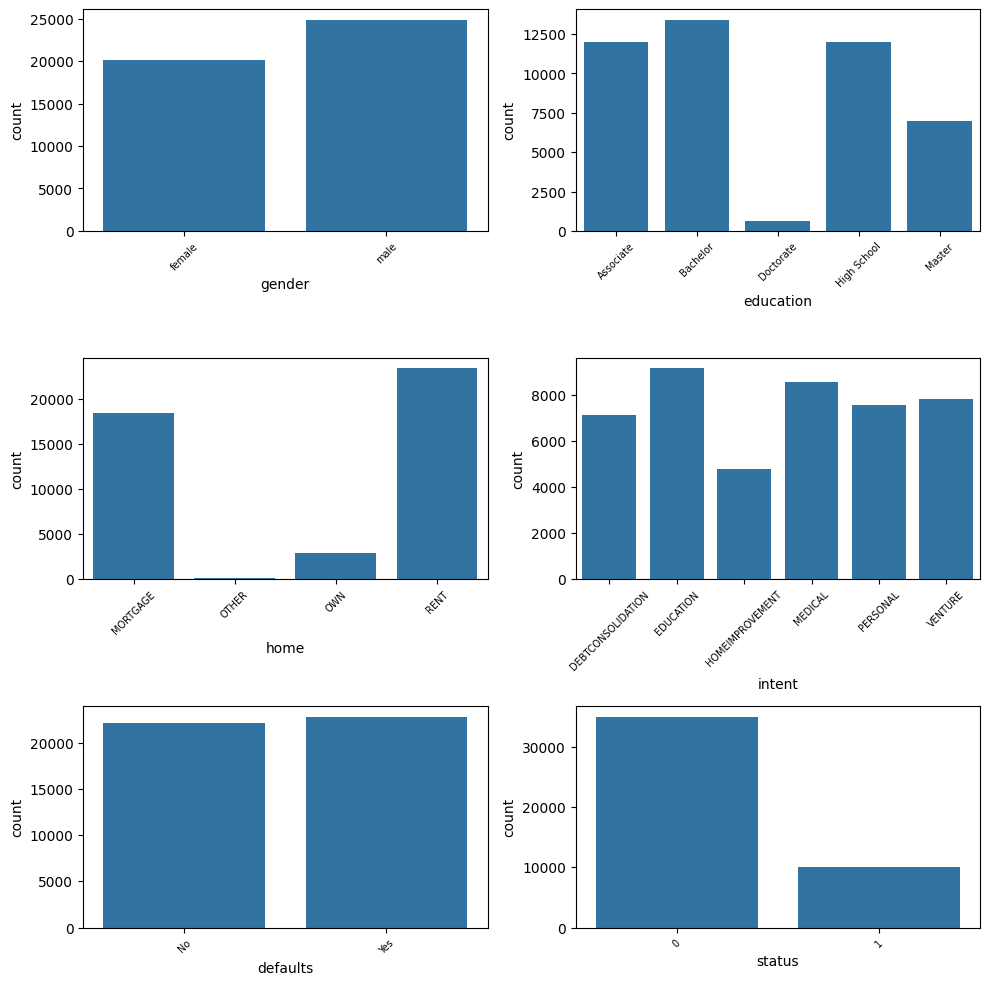

In [12]:
df_quanti = df[quanti]
import seaborn as sns
fig = plt.subplots(3,2,figsize=(10,10))
for i,col in enumerate(quali):
    plt.subplot(3,2,i+1)
    sns.barplot(df[col].value_counts())
    plt.xticks(rotation=45,fontsize=7)
plt.tight_layout()
plt.show()

### Quantitative variable

In [13]:
quanti

['age',
 'income',
 'emp_exp',
 'amnt',
 'rate',
 'percentage',
 'cred_hist',
 'score']

In [14]:
df_quanti = df[quanti]
df_quanti.head()

age   income  emp_exp     amnt   rate  percentage  cred_hist  score
0  22.0  71948.0        0  35000.0  16.02        0.49        3.0    561
1  21.0  12282.0        0   1000.0  11.14        0.08        2.0    504
2  25.0  12438.0        3   5500.0  12.87        0.44        3.0    635
3  23.0  79753.0        0  35000.0  15.23        0.44        2.0    675
4  24.0  66135.0        1  35000.0  14.27        0.53        4.0    586

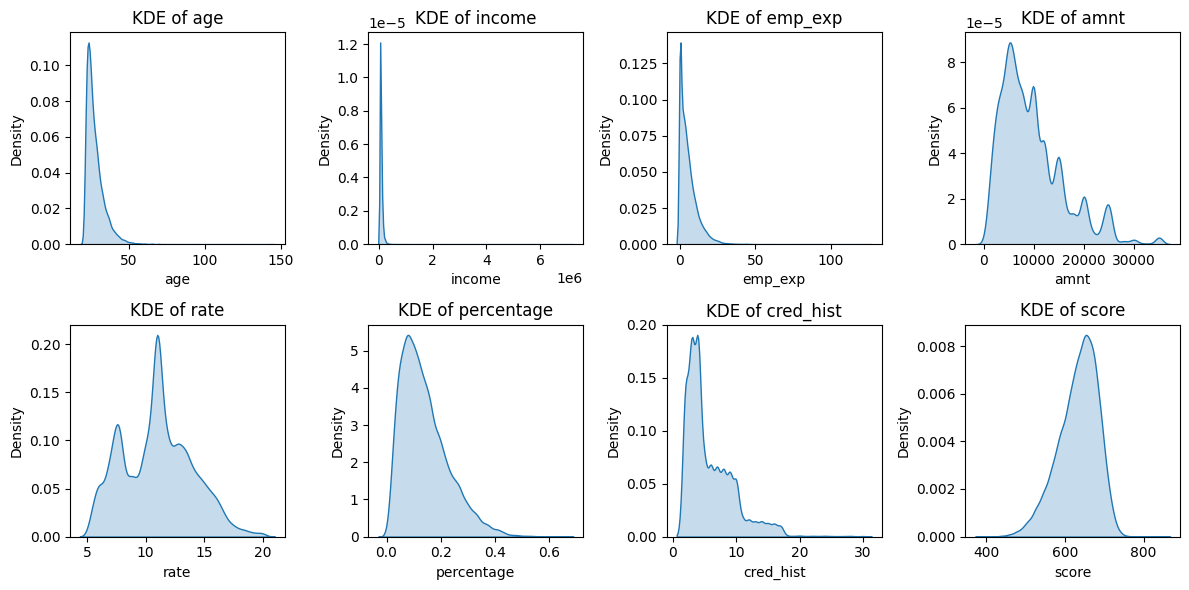

In [15]:
fig = plt.subplots(2,4,figsize=(12,6))
for i,column in enumerate(quanti):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df[column].astype('float'), fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE of {column}')
plt.tight_layout()
plt.show()

**Comment**: There are a lot of outliers for age, income and number of exprienence years.

In [16]:
df.dtypes

age            float64
gender        category
education     category
income         float64
emp_exp          int64
home          category
amnt           float64
intent        category
rate           float64
percentage     float64
cred_hist      float64
score            int64
defaults      category
status        category
dtype: object

In [17]:

df_potential_anomalies = df[['age','income','emp_exp','cred_hist']][(df['age']>90) ]


In [18]:
print(df_potential_anomalies.shape[0]/df.shape[0])

0.007711111111111111


**Comment**: As the number of "potential" anomalies is 0.7% of total dataset, removing these individuals should not impact the dataset.

In [19]:
df_clean =df.merge(df_potential_anomalies, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

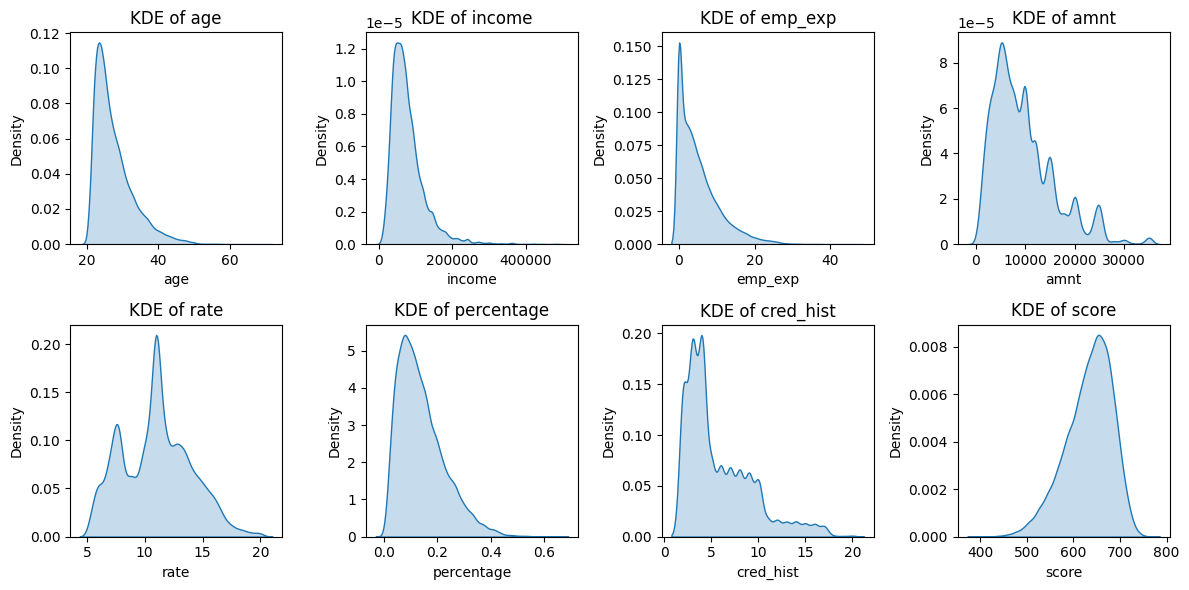

In [20]:
fig = plt.subplots(2,4,figsize=(12,6))
for i,column in enumerate(quanti):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_clean[column].astype('float'), fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE of {column}')
plt.tight_layout()
plt.show()

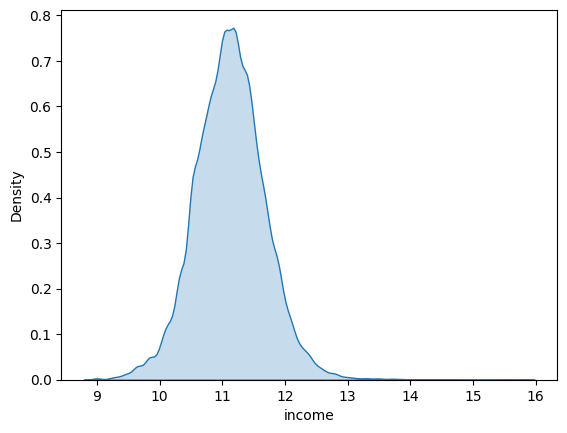

In [21]:
var = 'income'
sns.kdeplot(np.log(df[var]),label='var',fill=True)
plt.show()
df_clean['Lincome'] = np.log(df_clean['income'])
del df_clean['income']

In [22]:
df_clean.columns

Index(['age', 'gender', 'education', 'emp_exp', 'home', 'amnt', 'intent',
       'rate', 'percentage', 'cred_hist', 'score', 'defaults', 'status',
       'Lincome'],
      dtype='object')

In [23]:
quanti=['age', 'emp_exp', 'amnt','rate', 'percentage',
       'cred_hist', 'score','Lincome']

## Multi-dimensional Study

### Categorical vs Categorical

In [24]:
print(quali)

['gender', 'education', 'home', 'intent', 'defaults', 'status']


#### CA (Correspondence Analysis)
Correspondance analysis measures the 

#### CA - Khi2 independence tests

#### MCA (multiple correspendence analysis)


In [25]:
df_quali=df_clean[quali]
df_quali.set_index('status')


gender    education      home             intent defaults
status                                                           
1       female       Master      RENT           PERSONAL       No
0       female  High School       OWN          EDUCATION      Yes
1       female  High School  MORTGAGE            MEDICAL       No
1       female     Bachelor      RENT            MEDICAL       No
1         male       Master      RENT            MEDICAL       No
...        ...          ...       ...                ...      ...
1         male    Associate      RENT            MEDICAL       No
1       female    Associate      RENT    HOMEIMPROVEMENT       No
1         male    Associate      RENT  DEBTCONSOLIDATION       No
1         male     Bachelor      RENT          EDUCATION       No
1         male  High School      RENT  DEBTCONSOLIDATION       No

[44653 rows x 5 columns]

Multiple Correspondance Analysis (MCA) is a data analysis technique for reducing dimensionality among qualitative variables.
It can minimize intra class variance and maximize inter class variance. It is similar to the Principle Components Analysis (PCA), but uses a definition of the distance between individuals and between classes that takes into consideration the rarity of the class.

In [26]:
count=0 #21
for q in quali:
    if q!="status":
        print(df_quali[q].value_counts())
        print("-------")

gender
male      24611
female    20042
Name: count, dtype: int64
-------
education
Bachelor       13323
Associate      11924
High School    11858
Master          6945
Doctorate        603
Name: count, dtype: int64
-------
home
RENT        23269
MORTGAGE    18339
OWN          2930
OTHER         115
Name: count, dtype: int64
-------
intent
EDUCATION            9117
MEDICAL              8478
VENTURE              7782
PERSONAL             7428
DEBTCONSOLIDATION    7090
HOMEIMPROVEMENT      4758
Name: count, dtype: int64
-------
defaults
Yes    22706
No     21947
Name: count, dtype: int64
-------


In [27]:
import prince
mca = prince.MCA(
    n_components=20,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

df_quali_no_status = df_quali.drop('status',axis=1)
mca = mca.fit(df_quali_no_status)

In [28]:
print(mca.eigenvalues_)
print(mca.percentage_of_variance_)

[2.42258392e-01 2.17748636e-01 2.09123946e-01 2.03678516e-01
 2.01274159e-01 2.00845351e-01 2.00258423e-01 1.99015251e-01
 1.98388149e-01 1.97468817e-01 1.94712184e-01 1.93344083e-01
 1.75382996e-01 1.66501098e-01 8.25571147e-34 6.37504382e-34
 5.02671474e-35 2.51370769e-36]
[8.65208543e+00 7.77673699e+00 7.46871234e+00 7.27423270e+00
 7.18836284e+00 7.17304824e+00 7.15208653e+00 7.10768754e+00
 7.08529102e+00 7.05245774e+00 6.95400657e+00 6.90514584e+00
 6.26367845e+00 5.94646777e+00 2.94846838e-32 2.27680136e-32
 1.79525526e-33 8.97752747e-35]


In [29]:
help(prince.MCA)

Help on class MCA in module prince.mca:

class MCA(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin, prince.ca.CA)
 |  MCA(n_components=2, n_iter=10, copy=True, check_input=True, random_state=None, engine='sklearn', one_hot=True)
 |  
 |  Method resolution order:
 |      MCA
 |      sklearn.base.BaseEstimator
 |      sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin
 |      sklearn.utils._metadata_requests._MetadataRequester
 |      sklearn.base.TransformerMixin
 |      sklearn.utils._set_output._SetOutputMixin
 |      prince.ca.CA
 |      prince.utils.EigenvaluesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_components=2, n_iter=10, copy=True, check_input=True, random_state=None, engine='sklearn', one_hot=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  column_coordinates(self, X)
 |      The column principal coordinates.
 |  
 |  column_cosine_similarities(self, X)
 |      Return the co

In [30]:
display(mca.eigenvalues_summary)

mca.scree_plot()

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.242         8.65%                      8.65%
1              0.218         7.78%                     16.43%
2              0.209         7.47%                     23.90%
3              0.204         7.27%                     31.17%
4              0.201         7.19%                     38.36%
5              0.201         7.17%                     45.53%
6              0.200         7.15%                     52.69%
7              0.199         7.11%                     59.79%
8              0.198         7.09%                     66.88%
9              0.197         7.05%                     73.93%
10             0.195         6.95%                     80.88%
11             0.193         6.91%                     87.79%
12             0.175         6.26%                     94.05%
13             0.167         5.95%                    100.00%
14             0.000         0.00%                    100.00%
15             0.000         0.00%                    100.00%
16             0.000         0.00%                    100.00%
17             0.000         0.00%                    100.00%

alt.Chart(...)

In [31]:
def plot_mca(ax1=0, ax2=1, mca=mca, data=df_quali_no_status,color='status'):
    dataset = mca.transform(data)
    dataset.reset_index(inplace=True)
    sns.scatterplot(data = dataset,
                  x = ax1, y = ax2,
                  hue = df_quali[color])
    
    plt.xlabel('Component {} — {:.2f}%'.format(ax1, mca.percentage_of_variance_[ax1]))
    plt.ylabel('Component {} — {:.2f}%'.format(ax2, mca.percentage_of_variance_[ax2]))
    plt.grid(True)
    plt.show()

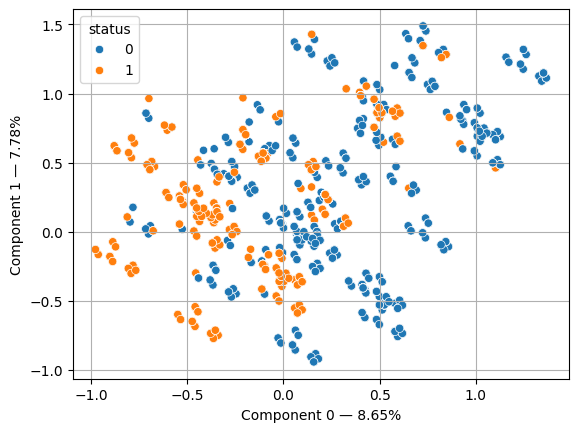

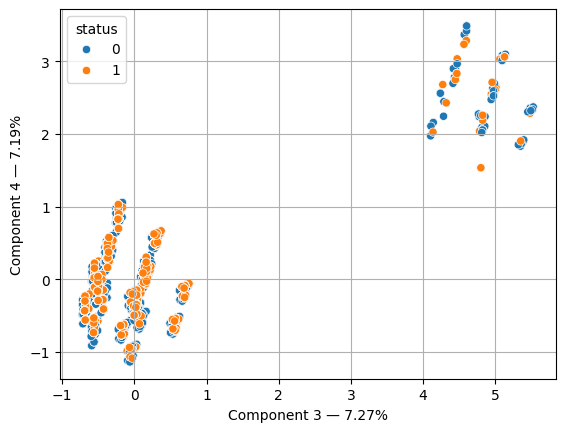

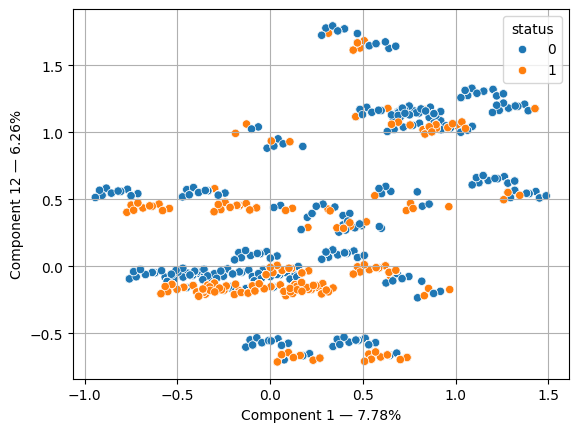

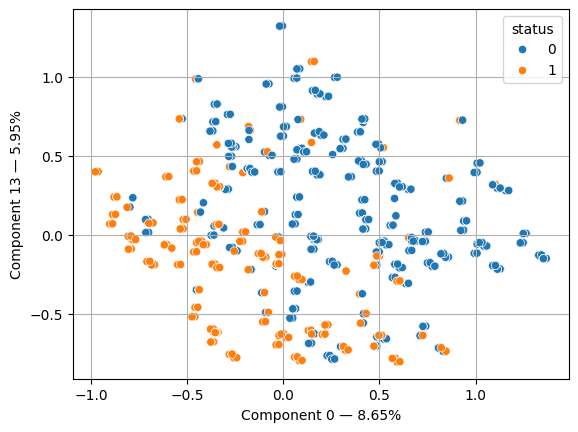

In [32]:
plot_mca(0,1)
plot_mca(3,4)
plot_mca(1,12)
plot_mca(0,13)

An observation on plane generated by components 0 and 13 shows that loan_status_yes and loan_status_no are resonably separable.

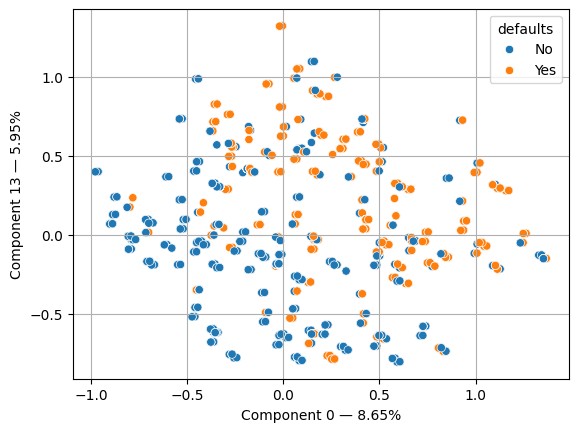

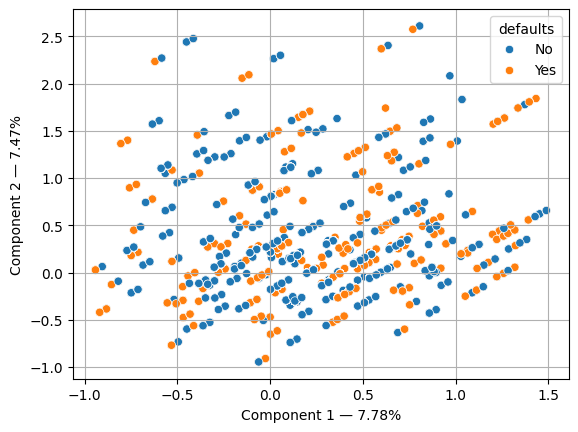

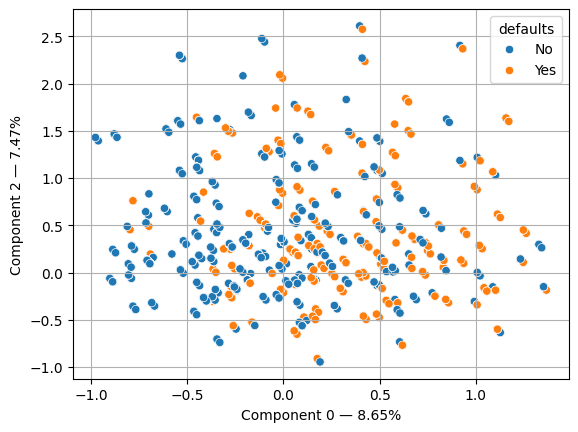

In [33]:
plot_mca(0,13,color = 'defaults' )
plot_mca(1,2,color = 'defaults')
plot_mca(0,2,color = 'defaults')

An observation on plane generated by components 0,1 and 0,2 show that previous_loan_defaults_yes and previous_loan_defaults_no are well separable.

In [34]:
# Contribution of columns to components

contrib = mca.column_contributions_.style.format('{:.1%}')
display(contrib.highlight_max(color='orange').highlight_min(color='lightblue'))

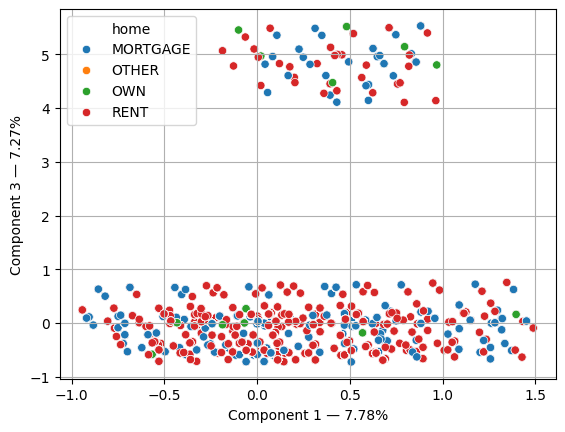

In [35]:
plot_mca(1,3,color='home')

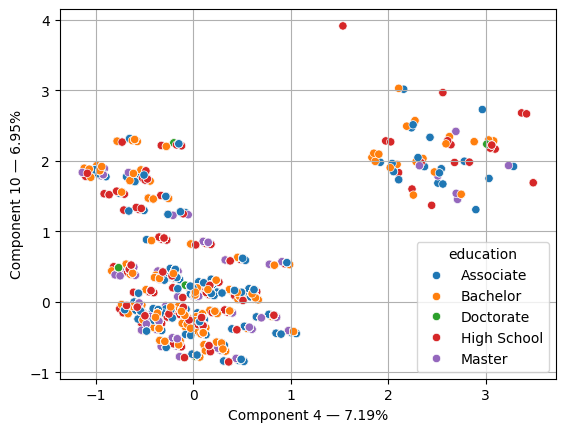

In [36]:
plot_mca(4,10,color='education')

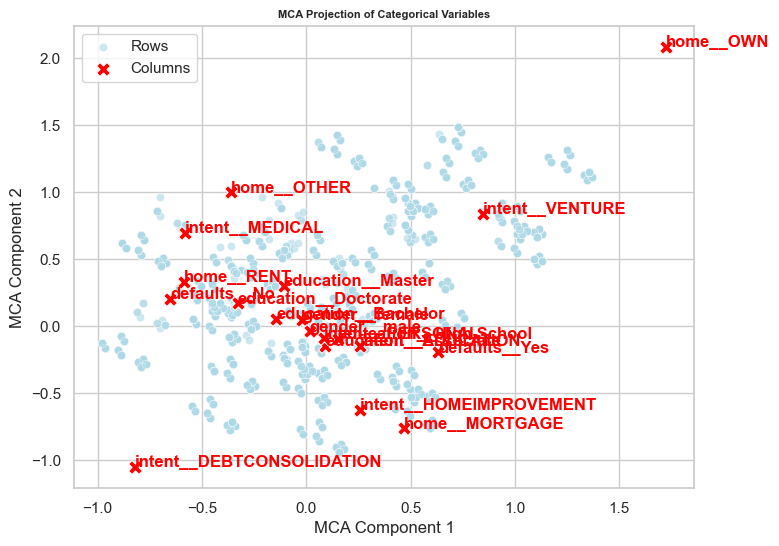

In [37]:

# Get transformed row and column coordinates
row_coords = mca.transform(df_quali_no_status)
col_coords = mca.column_coordinates(df_quali_no_status)

# Create a Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot row coordinates (individuals)
sns.scatterplot(x=row_coords[0], y=row_coords[1], color="lightblue", label="Rows", alpha=0.6)

# Plot column coordinates (categories)
sns.scatterplot(x=col_coords[0], y=col_coords[1], color="red", marker="X", label="Columns", s=100)

# Annotate column coordinates (categories)
for i, col in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], col, color='red', fontsize=12, fontweight='bold')

# Customize plot
plt.title("MCA Projection of Categorical Variables", fontsize=8, fontweight="bold")
plt.xlabel("MCA Component 1", fontsize=12)
plt.ylabel("MCA Component 2", fontsize=12)
plt.legend()
plt.show()


**Comment**: Visually, individuals with attributes such as intent_medical, home_rent, home_other, education_Master, and education_Doctorate—positioned in the top left—appear to have a lower likelihood of default compared to those with attributes like intent_homeimprovement, home_mortgage, etc., located in the bottom right."

### Quantitative vs Quantitative

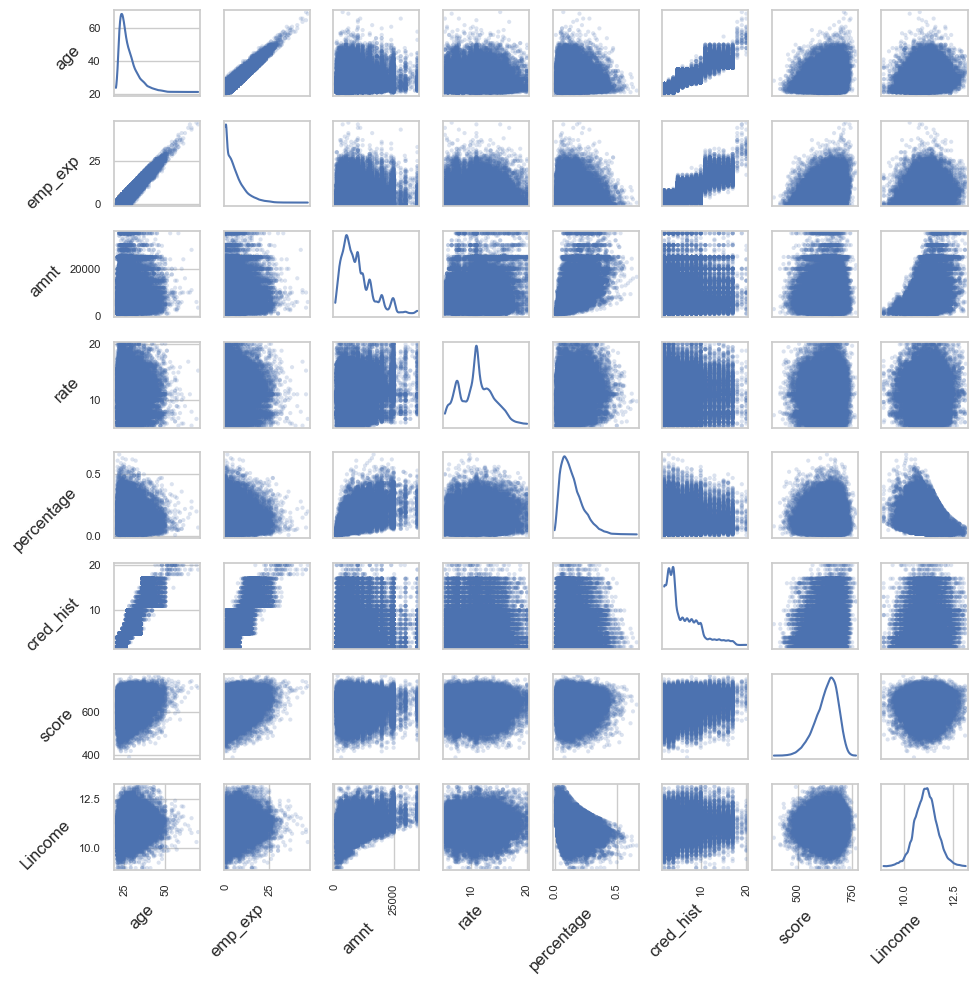

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'gym' is your DataFrame
from pandas.plotting import scatter_matrix

df_quanti = df_clean[quanti]

# Create the scatter matrix
sm = scatter_matrix(df_quanti,
              alpha=0.2,
              diagonal='kde',
              figsize=(10,10))

# Get the current figure
fig = plt.gcf()

# Loop through all axes in the figure
for ax in fig.axes:
    # Rotate the variable names on the diagonal plots
    if ax.get_title():
        ax.set_title(ax.get_title(), rotation=45, ha='right')

    # Rotate the variable names on the off-diagonal plots
    if ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

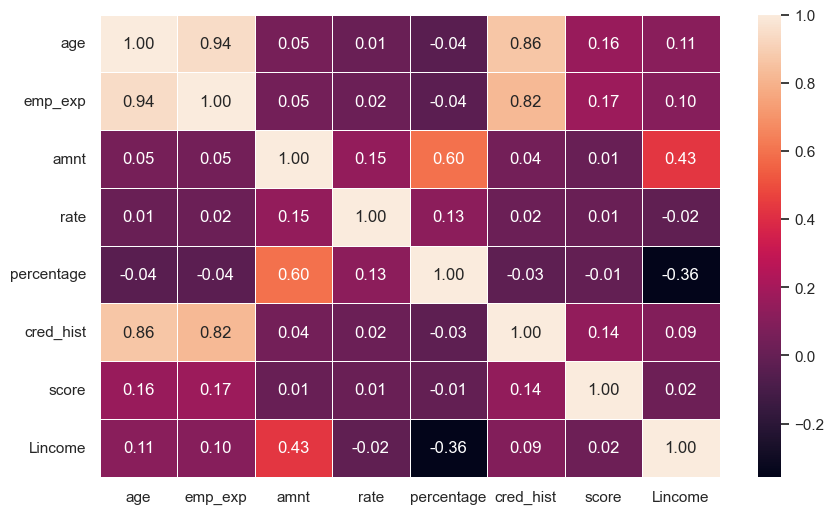

In [40]:
# Correlation matrix 

corr = df_quanti.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

**Comment**: Age, emp_exp, cred_hist are strongly correlated triplet.

#### Principal Component Analysis

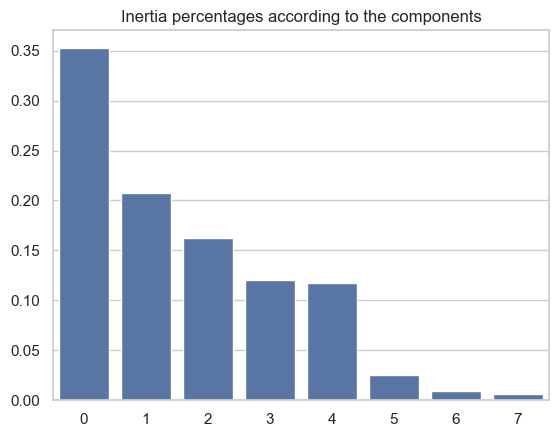

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(df_quanti)

pca = PCA()
X_pca = pca.fit(X_scaled).transform(X_scaled)

# Plot of inertia percentage according to the components
sns.barplot(pca.explained_variance_ratio_)
plt.title('Inertia percentages according to the components')
plt.show()

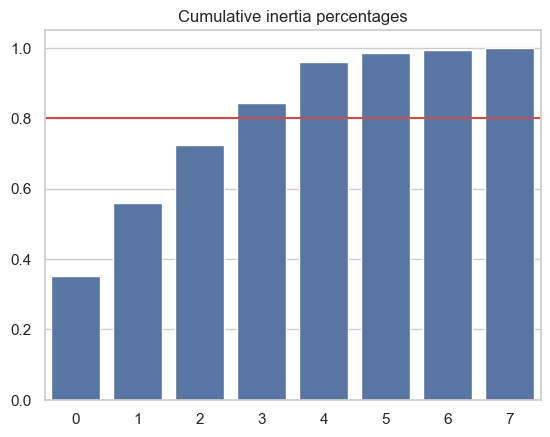

In [44]:
# Plot of cumulative variance

sns.barplot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8,color='r',linestyle='-')
plt.title('Cumulative inertia percentages')
plt.show()

**Comment**: We can keep 80% of inertia by observing the first four components.

<Axes: ylabel='Density'>

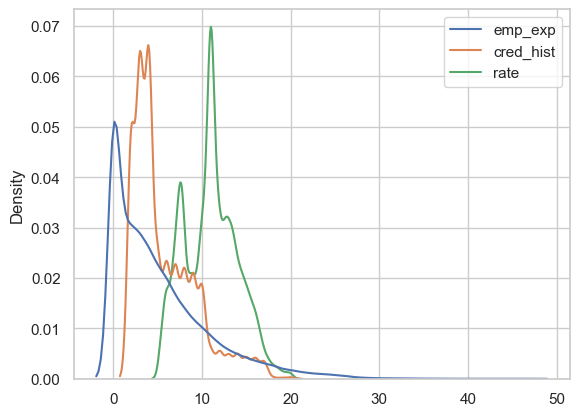

In [45]:
sns.kdeplot(df_clean[['emp_exp','cred_hist','rate']],legend=True)

##### Representation of individuals on pca components

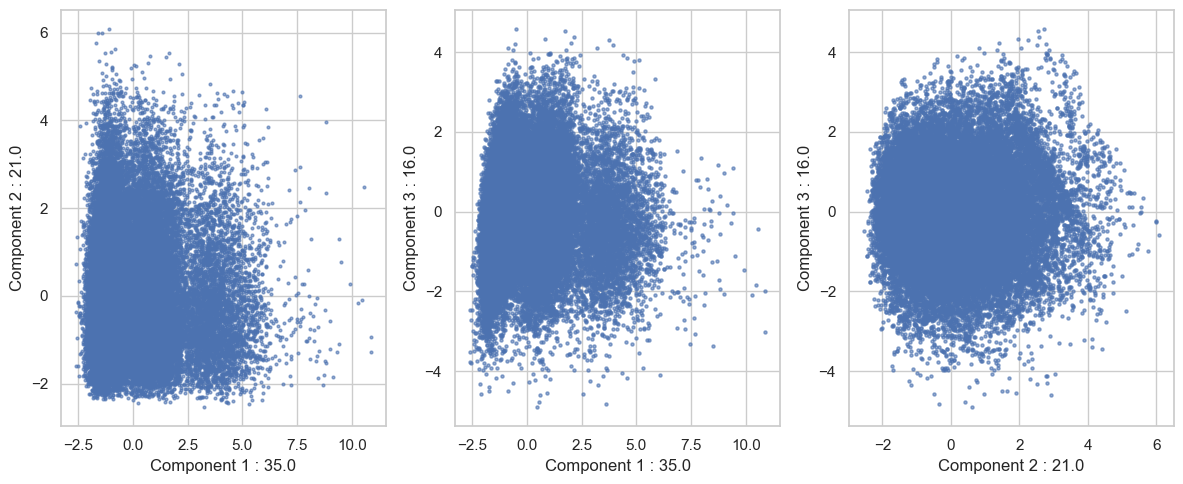

In [46]:

fig,axs = plt.subplots(1,3,figsize=(12,5))

axs[0].scatter(X_pca[:,0],X_pca[:,1],alpha=0.6, s=4)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],alpha=0.6, s=5)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],alpha=0.6, s=5)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

plt.tight_layout()
plt.show()

**Comment**: The presentation of indiviuals on ACP space look spherical. We do not see the evidence of subgroups.

#### Representation of individuals on pca components - cos2 coloring

In [47]:
row_sums = (X_scaled ** 2).sum(axis=1)
ind_cos2 = (X_pca ** 2)/row_sums[:,np.newaxis]
ind_cos2.shape

(44653, 8)

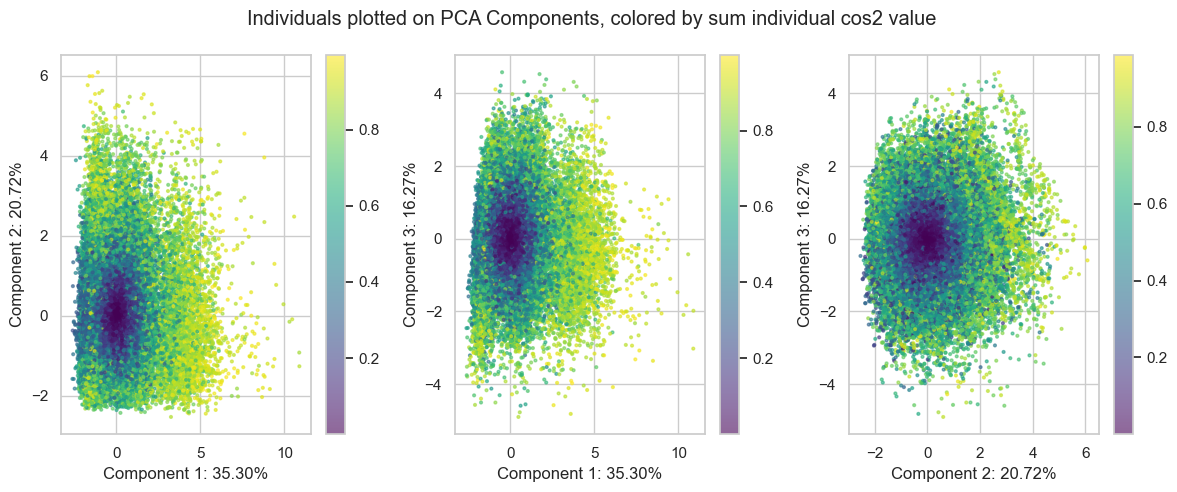

In [48]:
fig, axs = plt.subplots(1,3,figsize=(12,5))

scatter1 = axs[0].scatter(X_pca[:,0], X_pca[:,1], c = ind_cos2[:,0] + ind_cos2[:,1], cmap="viridis", alpha = 0.6, s = 4)
axs[0].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[0].set_ylabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")

scatter2 = axs[1].scatter(X_pca[:,0], X_pca[:,2], c = ind_cos2[:,0] + ind_cos2[:,2], cmap="viridis", alpha = 0.6, s = 4)
axs[1].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[1].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

scatter3 = axs[2].scatter(X_pca[:,1], X_pca[:,2], c = ind_cos2[:,1] + ind_cos2[:,2], cmap="viridis", alpha = 0.6, s = 4)
axs[2].set_xlabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")
axs[2].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

plt.colorbar(scatter1)
plt.colorbar(scatter2)
plt.colorbar(scatter3)

fig.suptitle("Individuals plotted on PCA Components, colored by sum individual cos2 value")
plt.tight_layout()
plt.show()

**Comment**: Points on the right edge , especially in yellow, are better represented and may be more meaningful for interpretation.

#### Representation of individuals on pca components - residual cos2 coloring

In [49]:
cols = np.array([i for i in range(8)])
print(cols)
f = lambda x,y: np.delete(cols, np.where((cols==x) | (cols==y)))
F = lambda x,y: ind_cos2[:,f(x,y)].sum(axis=1)

[0 1 2 3 4 5 6 7]


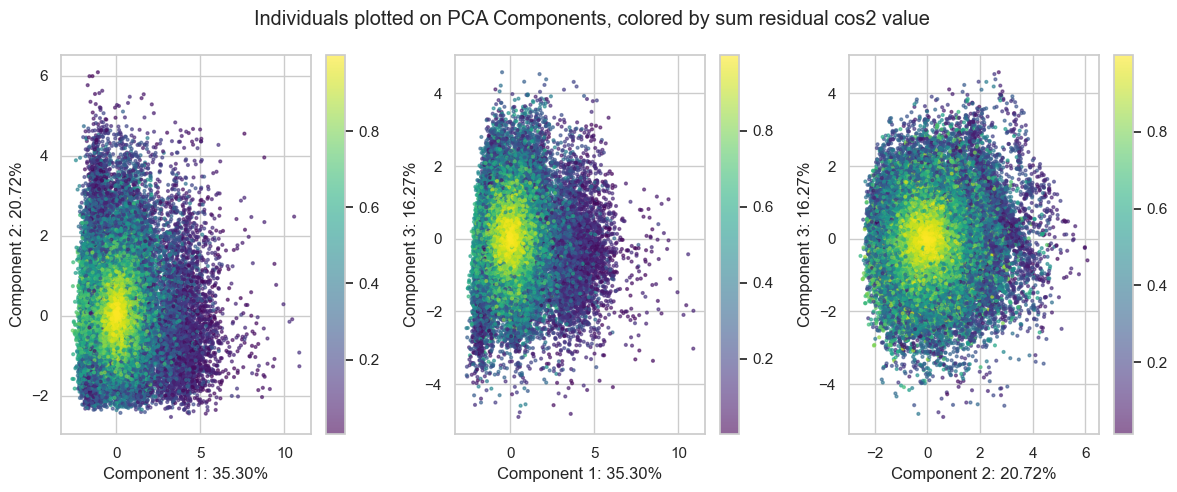

In [50]:
fig, axs = plt.subplots(1,3,figsize=(12,5))

scatter1 = axs[0].scatter(X_pca[:,0], X_pca[:,1], c = F(0,1), cmap="viridis", alpha = 0.6, s = 4)
axs[0].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[0].set_ylabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")

scatter2 = axs[1].scatter(X_pca[:,0], X_pca[:,2], c = F(0,2), cmap="viridis", alpha = 0.6, s = 4)
axs[1].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[1].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

scatter3 = axs[2].scatter(X_pca[:,1], X_pca[:,2], c = F(1,2), cmap="viridis", alpha = 0.6, s = 4)
axs[2].set_xlabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")
axs[2].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

plt.colorbar(scatter1)
plt.colorbar(scatter2)
plt.colorbar(scatter3)

fig.suptitle("Individuals plotted on PCA Components, colored by sum residual cos2 value")
plt.tight_layout()
plt.show()

**Conclusion:** Although coloring based on individual cos2 value seemed like an interesting idea, it proved not that insightful, as indivuals close to the origin showed a small cos2 value meaning they where not well represented. Likewise, well represented data points, at the far ends of the "cloud" showed a small residual cos2 value, because the information had already been captured by the PCA components.

#### Representation of individuals on PCA components - coloring by qualitative class belonging

In [51]:
print(f"We will color the datapoints based on : {df_quali.columns.to_list()}")

We will color the datapoints based on : ['gender', 'education', 'home', 'intent', 'defaults', 'status']


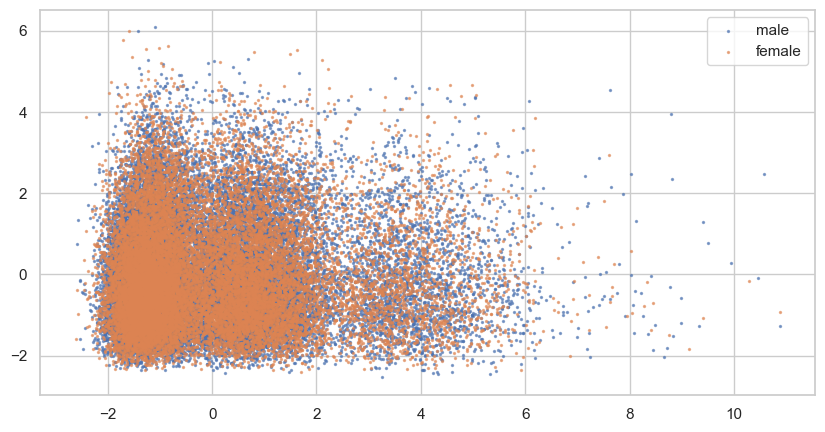

In [52]:
# color according to gender
male_idx = df_quali['gender'] =='male'
plt.figure(figsize=(10,5))
plt.scatter(X_pca[male_idx,0],X_pca[male_idx,1],label='male',alpha=0.6, s=2)
plt.scatter(X_pca[~male_idx,0],X_pca[~male_idx,1],label='female',alpha=0.6, s=2)
plt.legend()
plt.show()

In [53]:
df['defaults'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

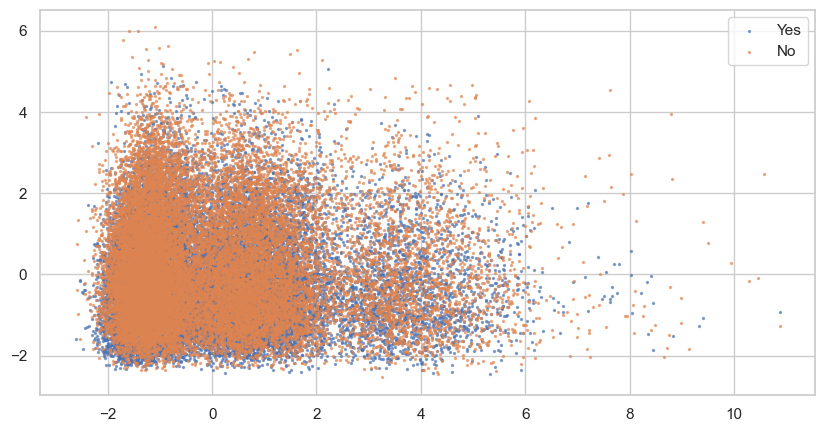

In [54]:
# color according to defaults

defaut_idx = df_quali['defaults'] =='Yes'
plt.figure(figsize=(10,5))
plt.scatter(X_pca[defaut_idx,0],X_pca[defaut_idx,1],label='Yes',alpha=0.6, s=2)
plt.scatter(X_pca[~defaut_idx,0],X_pca[~defaut_idx,1],label='No',alpha=0.6, s=2)
plt.legend()
plt.show()

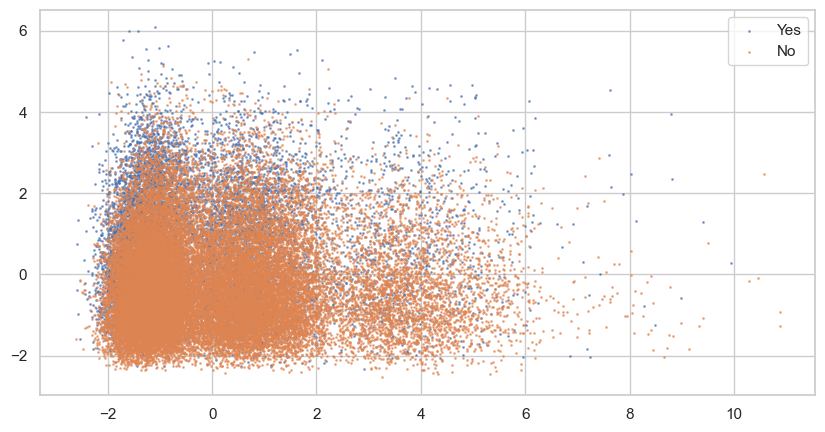

In [55]:
# color according to status

status_idx = df_quali['status'] ==1
plt.figure(figsize=(10,5))
plt.scatter(X_pca[status_idx,0],X_pca[status_idx,1],label='Yes',alpha=0.6, s=1)
plt.scatter(X_pca[~status_idx,0],X_pca[~status_idx,1],label='No',alpha=0.6, s=1)
plt.legend()
plt.show()

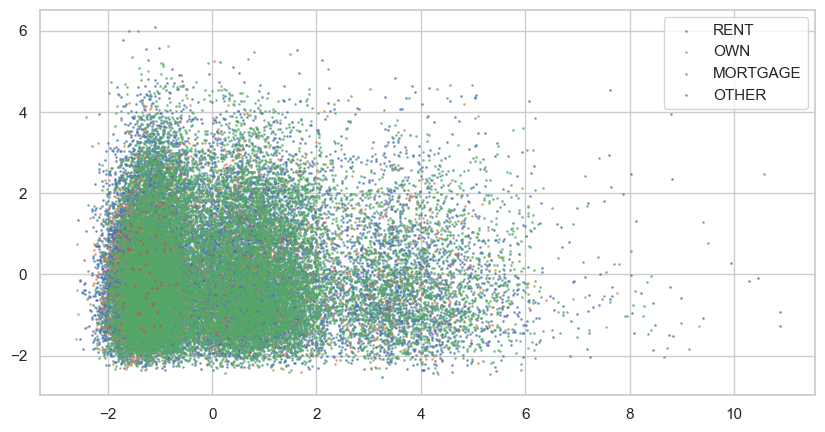

In [56]:
plt.figure(figsize=(10,5))
for home in df_quali['home'].unique():
    idx = df_quali['home']==home
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=home,alpha=0.6, s=1)
plt.legend()
plt.show()

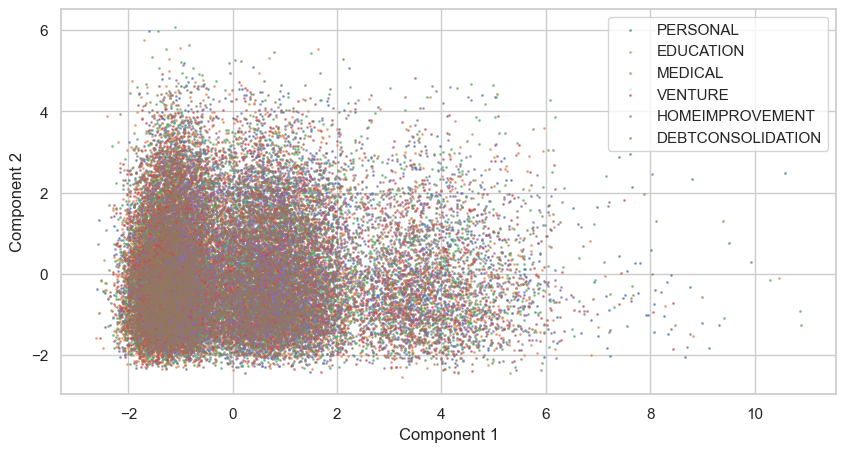

In [57]:
plt.figure(figsize=(10,5))
for intent in df_quali['intent'].unique():
    idx = df_quali['intent']==intent
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=intent,alpha=0.6, s=1)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

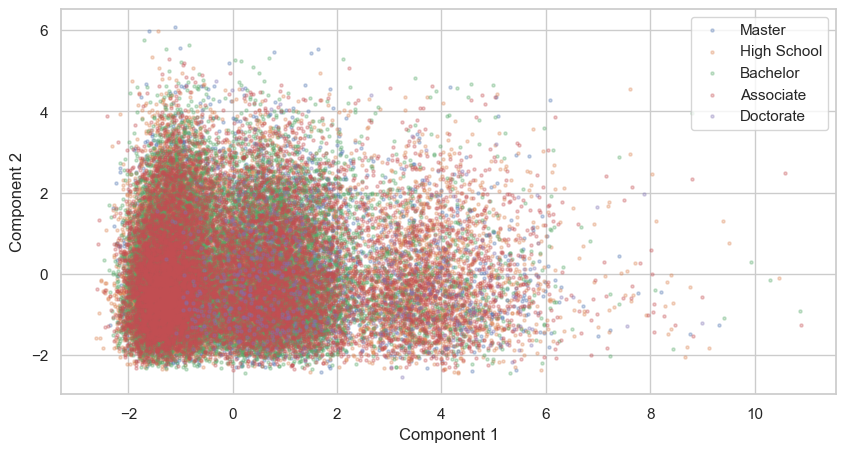

In [58]:
plt.figure(figsize=(10,5))
for edu in df_quali['education'].unique():
    idx = df_quali['education']==edu
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=edu,alpha=0.3, s=5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

##### Representation of Variables

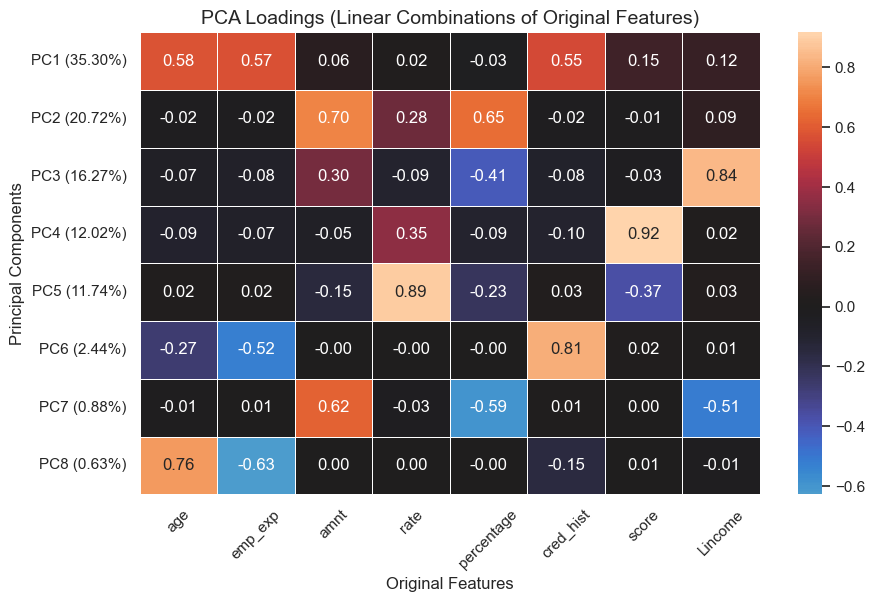

In [59]:

# plt.figure(figsize = (10,6))
# sns.heatmap(pca.components_, annot = True, fmt='.2f',linewidths=0.5)
# plt.show()

loadings = pd.DataFrame(
    pca.components_, 
    columns=quanti, 
    index=[f"PC{i+1} ({pca.explained_variance_ratio_[i]:.2%})" for i in range(pca.n_components_)]
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    loadings, 
    annot=True, 
    fmt='.2f', 
    linewidths=0.5, 
    # cmap="coolwarm",  # Diverging colormap
    center=0  # Emphasize positive & negative values
)

# Improve aesthetics
plt.title("PCA Loadings (Linear Combinations of Original Features)", fontsize=14)
plt.xlabel("Original Features", fontsize=12)
plt.ylabel("Principal Components", fontsize=12)
plt.xticks(rotation=45)  # Rotate feature names for readability
plt.yticks(rotation=0) # rotate horizontally


# Show plot
plt.show()

**Interpretation**: The above matrix shows the composition of the different features in our Principal Components (PCs). The first PC is the one that best explains the variance in our dataset, the second the second best, and so on. Our first order of business is to comment on the ratio of variance explained by the different PCs. 
### Variance explained
More than half (~56%) of the dataset's quantitative variance can be explained using the first two PCs. Including the next two components, we get a satisfactory explained variance ratio of more than 80% (~84%). Upon first glance, it would seem that the first two PCs give a lot of the information, while the two next PCs provide the details. 

### PC composition
1. The first PC is primarily positively correlated with *Age*, *Employment Experience*, and *Credit History*. It also has a small, positive correlation with the variables *Credit Score* and *Income*. It would seem to capture the **financial stability** of a client.
2. The second PC is primarily positively correltaed with *Loan Amount* and *Loan Percentage of Income*. It is also moderately positively correlated with *Interest Rate*. This PC seems to capture the **loan-side information**, contrary to the first PC. It should not come as a surprise that these two PCs capture a large amount of the information.
3. The third PC is primarily positively correlated with the *Income* variable*, as well as the *Loan Amount* (positively) and *Loan Percentage of Income* (negatively), but in a more moderate way. It would seem like this PC captures the relationship between the client's income and the loan. This further strengthens the idea of two primary and two complementary PCs.
4. The fourth PC is primarily postively correlated with the *Credit Score* variable, as well as moderately positively correlated with the *Interest Rate*. Both of these variables have no major correlation with any of the other variables (ref. correlation matrix), so it would seem this PC captures some of the information left out by the previous PCs, although a precise interpretation is though to come by.

<bound method Axes.set of <Axes: >>

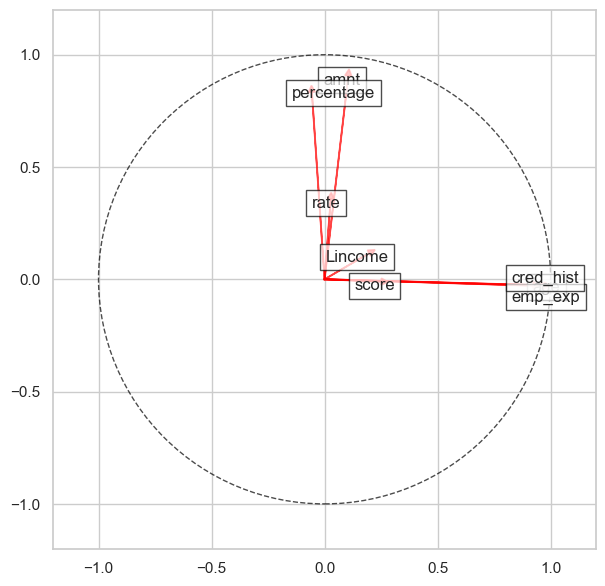

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Compute coordinates for the PCA vectors
coord0 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord1 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Store text objects for adjustment
texts = []

# Plot vectors with labels
for i, j, nom in zip(coord0, coord1, quanti):
    plt.arrow(0, 0, i, j, color='red', alpha=0.7, head_width=0.03, head_length=0.03, linewidth=1.2)
    text = plt.text(i, j, nom, fontsize=12, ha='center', va='center', 
                    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
    texts.append(text)

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add unit circle
circle = plt.Circle((0, 0), radius=1.0, color='black', fill=False, linestyle='dashed', alpha=0.7)
ax.add_patch(circle)

# Set axis limits and labels
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set


**Comment**: The variable presentation on pca plane confirms our previous observation that cred_hist, emp_exp, and age are strongly correlated; moreover, we also remark that these 3 variables seem to be independent from amnt, percentage, and rate.

### Quantitative vs Categorical

#### Boxplots

Boxplot of all quantitative variables according to gender


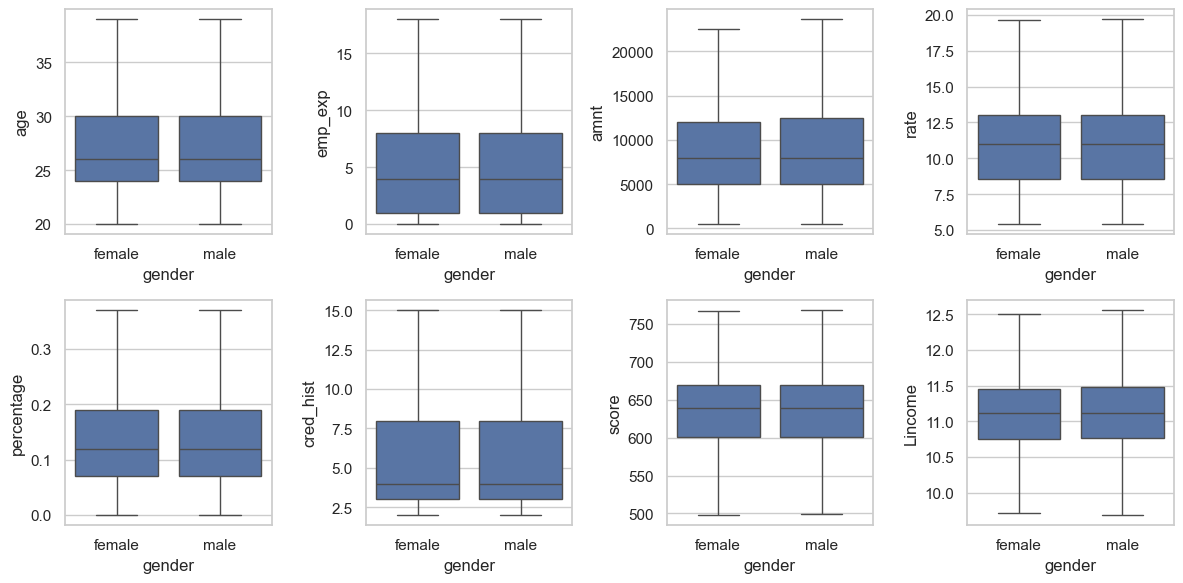

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to education


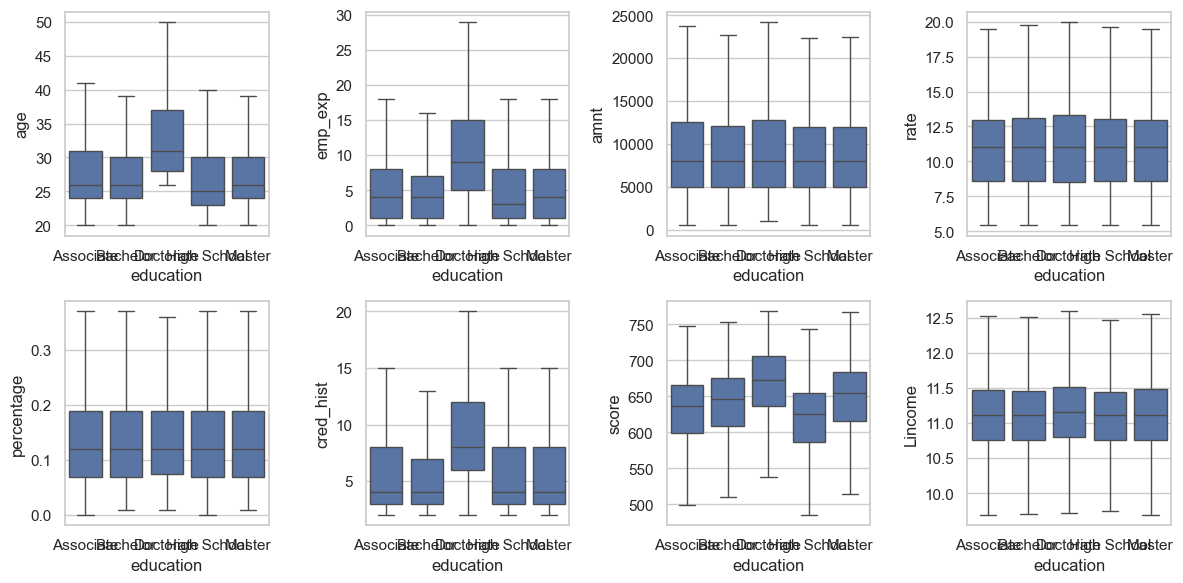

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to home


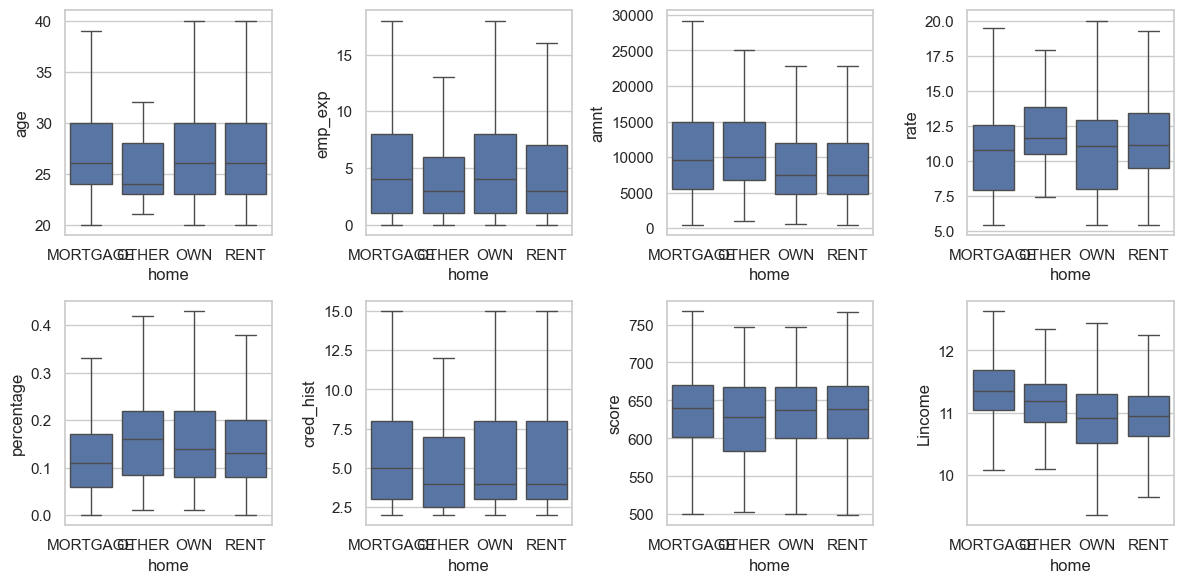

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to intent


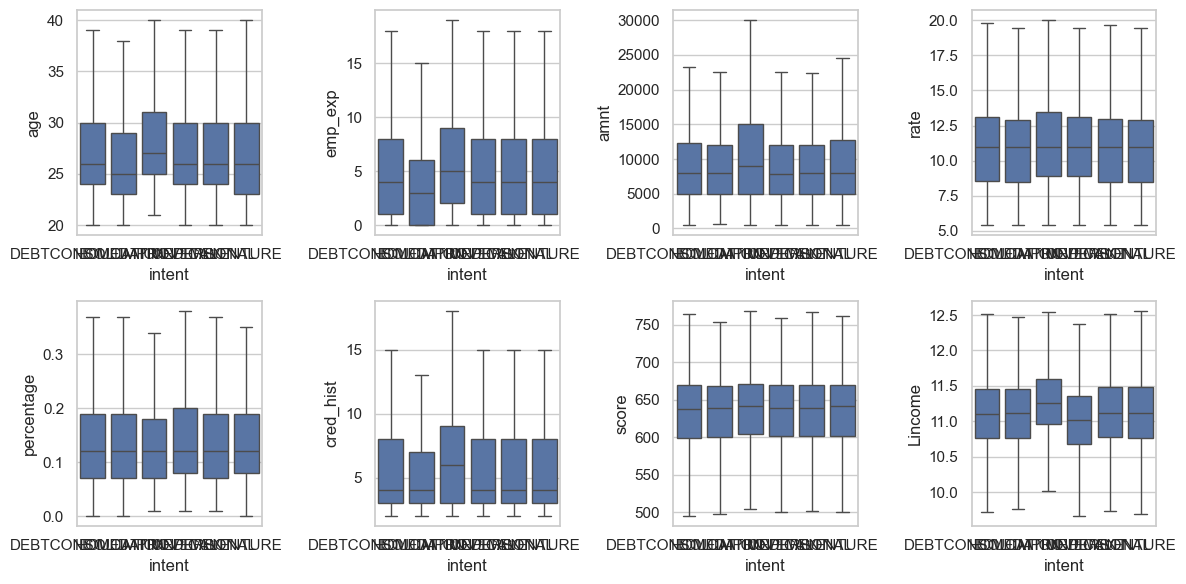

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to defaults


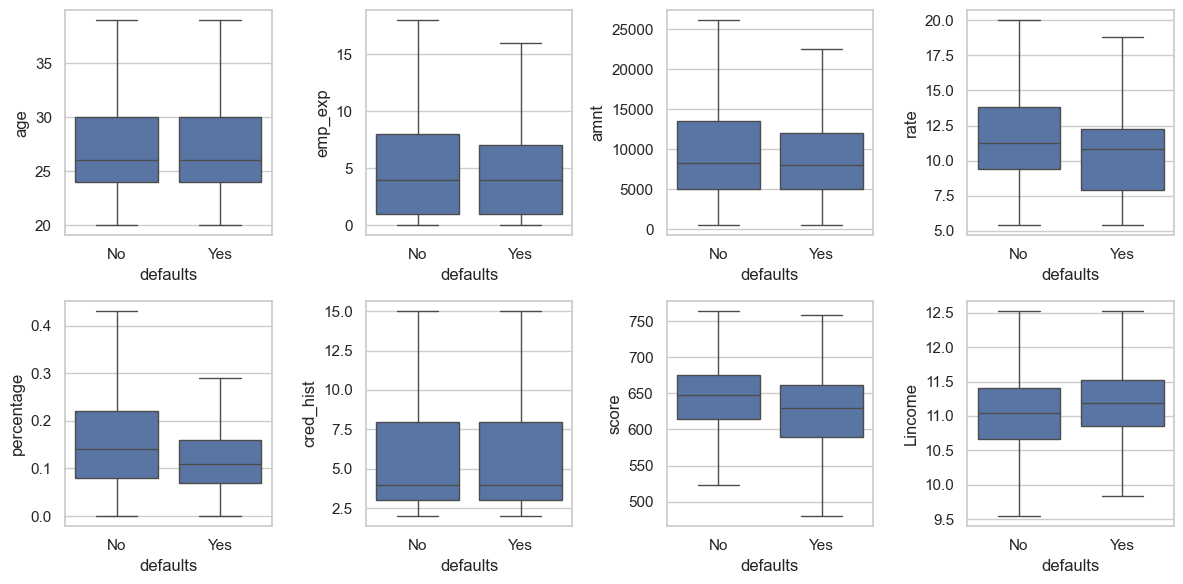

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to status


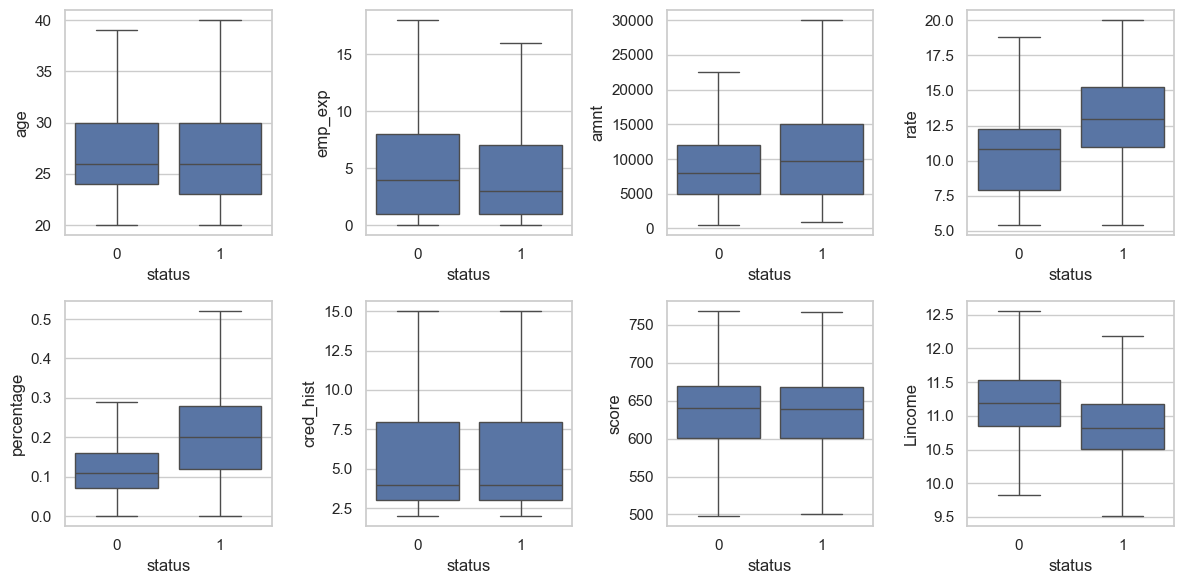

-----------------------------------------------------------------------------------


In [61]:

for i in range(len(quali)):
    print(f"Boxplot of all quantitative variables according to {quali[i]}")
    fig, axes = plt.subplots(2,4,figsize=(12,6))
    axes = np.ravel(axes)
    for j in range(len(quanti)):
        sns.boxplot(x=quali[i],y=quanti[j],data=df_clean,showfliers=False,ax=axes[j])
#         axes[j].set_title(f"{quanti[j]} vs {quali[i]}")
        # axes[j].axis('off')
    plt.tight_layout()
    plt.show()
    print ("-----------------------------------------------------------------------------------")

**Comment**: I propose to perform MFA

#### MFA

In [62]:
df_clean.drop(columns="status")

age  gender    education  emp_exp      home     amnt  \
0      22.0  female       Master        0      RENT  35000.0   
1      21.0  female  High School        0       OWN   1000.0   
2      25.0  female  High School        3  MORTGAGE   5500.0   
3      23.0  female     Bachelor        0      RENT  35000.0   
4      24.0    male       Master        1      RENT  35000.0   
...     ...     ...          ...      ...       ...      ...   
44995  27.0    male    Associate        6      RENT  15000.0   
44996  37.0  female    Associate       17      RENT   9000.0   
44997  33.0    male    Associate        7      RENT   2771.0   
44998  29.0    male     Bachelor        4      RENT  12000.0   
44999  24.0    male  High School        1      RENT   6665.0   

                  intent   rate  percentage  cred_hist  score defaults  \
0               PERSONAL  16.02        0.49        3.0    561       No   
1              EDUCATION  11.14        0.08        2.0    504      Yes   
2                MEDICAL  12.87        0.44        3.0    635       No   
3                MEDICAL  15.23        0.44        2.0    675       No   
4                MEDICAL  14.27        0.53        4.0    586       No   
...                  ...    ...         ...        ...    ...      ...   
44995            MEDICAL  15.66        0.31        3.0    645       No   
44996    HOMEIMPROVEMENT  14.07        0.14       11.0    621       No   
44997  DEBTCONSOLIDATION  10.02        0.05       10.0    668       No   
44998          EDUCATION  13.23        0.36        6.0    604       No   
44999  DEBTCONSOLIDATION  17.05        0.13        3.0    628       No   

         Lincome  
0      11.183699  
1       9.415890  
2       9.428512  
3      11.286690  
4      11.099453  
...          ...  
44995  10.778352  
44996  11.094375  
44997  10.949788  
44998  10.409220  
44999  10.851451  

[44653 rows x 13 columns]

In [63]:
from itertools import product
groups = {"Personals": ["age", "gender", "education", "emp_exp"],
          "Financials": ["amnt", "rate", "Lincome", "percentage"],
          "Credit": ["cred_hist", "score", "defaults"],
          "Details": ["home", "intent"]
         }
df_mfa = pd.DataFrame()
for k in groups.keys():
    for i in groups[k]:
        df_mfa[(k,i)] = df_clean[i]

df_mfa.columns = pd.MultiIndex.from_tuples(df_mfa.columns.to_list())
print(df_mfa)
print("-----------")
print(df_mfa.dtypes)

      Personals                              Financials                    \
            age  gender    education emp_exp       amnt   rate    Lincome   
0          22.0  female       Master       0    35000.0  16.02  11.183699   
1          21.0  female  High School       0     1000.0  11.14   9.415890   
2          25.0  female  High School       3     5500.0  12.87   9.428512   
3          23.0  female     Bachelor       0    35000.0  15.23  11.286690   
4          24.0    male       Master       1    35000.0  14.27  11.099453   
...         ...     ...          ...     ...        ...    ...        ...   
44995      27.0    male    Associate       6    15000.0  15.66  10.778352   
44996      37.0  female    Associate      17     9000.0  14.07  11.094375   
44997      33.0    male    Associate       7     2771.0  10.02  10.949788   
44998      29.0    male     Bachelor       4    12000.0  13.23  10.409220   
44999      24.0    male  High School       1     6665.0  17.05  10.851451   

We need to change the following variables' types to ensure intragroup homogenousity:
- Personals, age: float -> category
- Personals, emp_exp: float -> category
- Credit, cred_hist: float -> category
- Credit, score: int -> category

----
          Personals              
                age       emp_exp
count  44653.000000  44653.000000
mean      27.569794      5.217343
std        5.471817      5.490897
min       20.000000      0.000000
25%       24.000000      1.000000
50%       26.000000      4.000000
75%       30.000000      8.000000
max       70.000000     47.000000


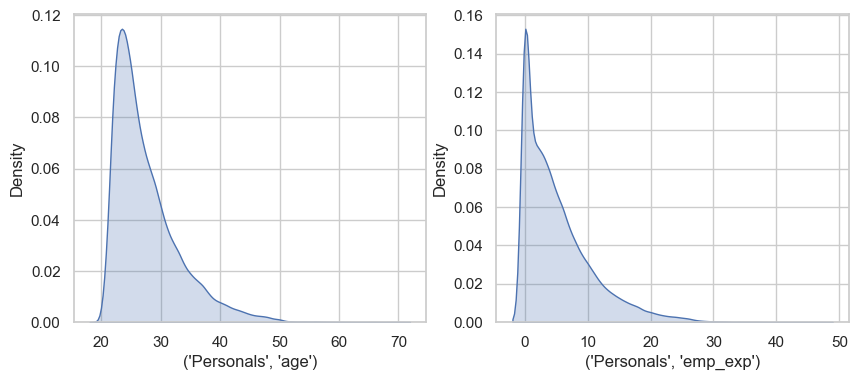

In [64]:
fig, Axes = plt.subplots(1,2,figsize=(10,4))
sns.kdeplot(df_mfa[("Personals","age")].astype(float), fill=True, ax=Axes[0])
sns.kdeplot(df_mfa[("Personals","emp_exp")].astype(float), fill=True, ax=Axes[1])
print("----")
print(df_mfa[[("Personals","age"),("Personals","emp_exp")]].describe())

<Axes: xlabel='(Personals, emp_exp)'>

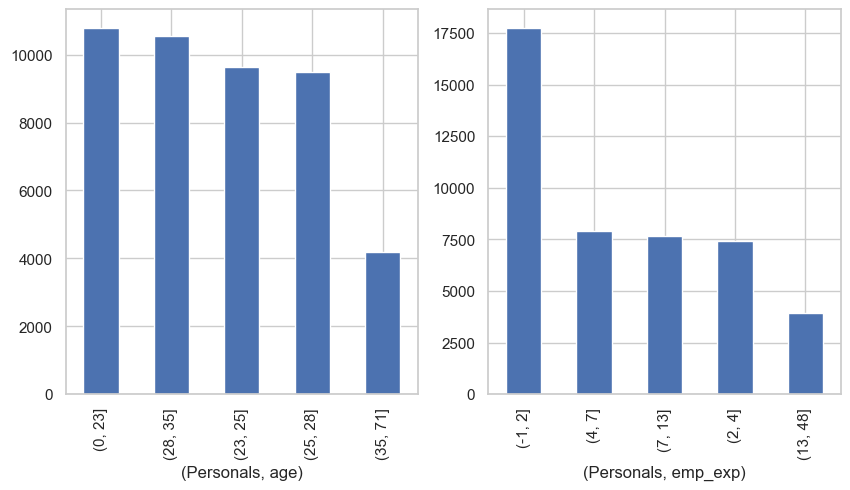

In [65]:
fig, Ax = plt.subplots(1,2,figsize=(10,5))

age_bins = pd.cut(df_mfa[("Personals","age")], bins=[0, 23, 25, 28, 35, 71])
age_bins.value_counts().plot(kind="bar", ax=Ax[0])
empexp_bins = pd.cut(df_mfa[("Personals","emp_exp")], bins=[-1, 2, 4, 7, 13, 48])
empexp_bins.value_counts().plot(kind="bar", ax=Ax[1])

In [66]:
#we perform the transformation
# binned = binned.astype(str).replace({
#     '(0.0, 1.0]': 'Small',
#     '(2.0, 3.0]': 'Medium',
#     '(4.0, 5.0]': 'Large'
# }).astype('category')

age_bins = age_bins.astype('str').replace({
    '(0, 23]':  'very young',
    '(23, 25]': 'young',
    '(25, 28]': 'adult',
    '(28, 35]': 'middle-aged',
    '(35, 71]': 'old'
}).astype('category')

empexp_bins = empexp_bins.astype('str').replace({
    '(-1, 2]':  'very small',
    '(2, 4]':   'small',
    '(4, 7]':   'quite small',
    '(7, 13]':  'medium',
    '(13, 48]': 'long'
}).astype('category')

df_mfa[("Personals","age")] = age_bins.astype("category")
df_mfa[("Personals","emp_exp")] = empexp_bins.astype("category")
print("----")
print(df_mfa.dtypes)

----
Personals   age           category
            gender        category
            education     category
            emp_exp       category
Financials  amnt           float64
            rate           float64
            Lincome        float64
            percentage     float64
Credit      cred_hist      float64
            score            int64
            defaults      category
Details     home          category
            intent        category
dtype: object


(2,)
----
             Credit              
          cred_hist         score
count  44653.000000  44653.000000
mean       5.749267    632.325600
std        3.596436     50.291155
min        2.000000    390.000000
25%        3.000000    601.000000
50%        4.000000    639.000000
75%        8.000000    669.000000
max       20.000000    768.000000


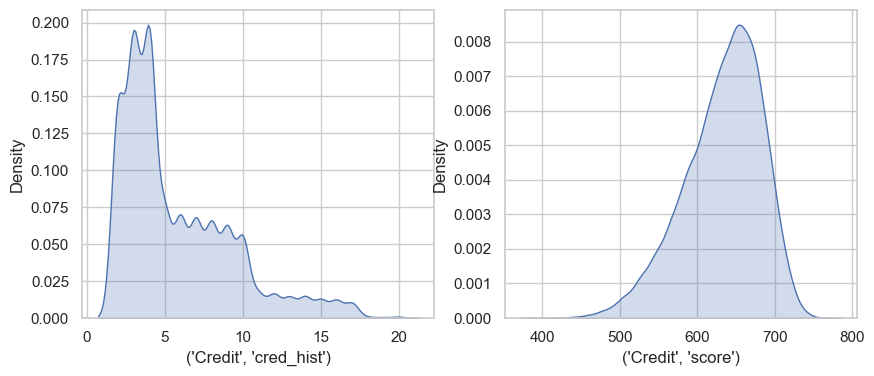

In [67]:
fig, Axes = plt.subplots(1,2,figsize=(10,4))
print(Axes.shape)
sns.kdeplot(df_mfa[("Credit","cred_hist")], fill=True, ax=Axes[0])
sns.kdeplot(df_mfa[("Credit","score")].astype(float), fill=True, ax=Axes[1])
print("----")
print(df_mfa[[("Credit","cred_hist"),("Credit","score")]].describe())

<Axes: xlabel='(Credit, score)'>

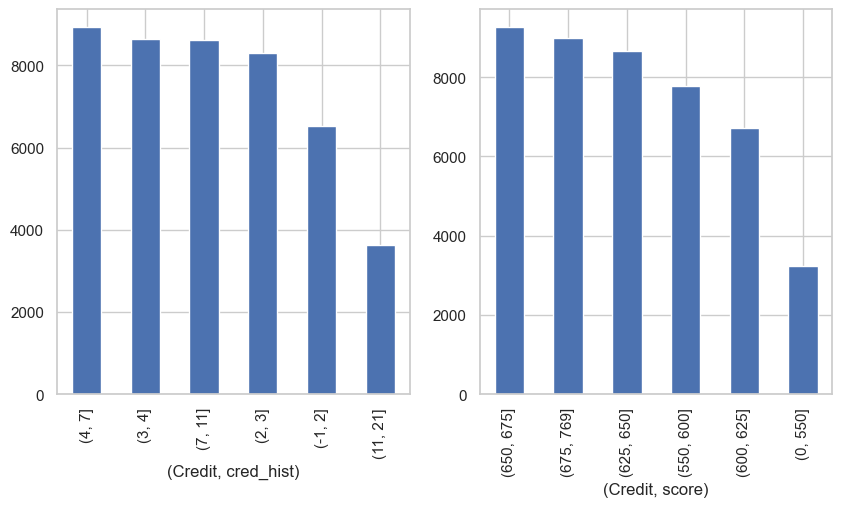

In [68]:
fig, Ax = plt.subplots(1,2,figsize=(10,5))

hist_bins = pd.cut(df_mfa[("Credit","cred_hist")], bins=[-1, 2, 3, 4, 7, 11, 21])
hist_bins.value_counts().plot(kind="bar", ax=Ax[0])
score_bins = pd.cut(df_mfa[("Credit","score")], bins=[0, 550, 600, 625, 650, 675, 769])
score_bins.value_counts().plot(kind="bar", ax=Ax[1])

In [69]:
#we perform the transformation
hist_bins = hist_bins.astype('str').replace({
    '(-1, 2]': 'very short',
    '(2, 3]': 'short',
    '(3, 4]': 'quite short',
    '(4, 7]': 'medium',
    '(7, 11]': 'long',
    '(11, 21]': 'very long'
})

score_bins = score_bins.astype('str').replace({
    '(0, 550]':   'very low',
    '(550, 600]': 'low',
    '(600, 625]': 'quite low',
    '(625, 650]': 'medium',
    '(650, 675]': 'high',
    '(675, 769]': 'insane'
})
    

df_mfa[("Credit","score")] = score_bins.astype("category")
df_mfa[("Credit","cred_hist")] = hist_bins.astype("category")
print("----")
print(df_mfa.dtypes)

----
Personals   age           category
            gender        category
            education     category
            emp_exp       category
Financials  amnt           float64
            rate           float64
            Lincome        float64
            percentage     float64
Credit      cred_hist     category
            score         category
            defaults      category
Details     home          category
            intent        category
dtype: object


In [70]:
nacounts = df_mfa.isna().sum()
nacounts.name = "nacounts"
dtypes = df_mfa.dtypes
dtypes.name = "dtypes"

print(pd.merge(dtypes, nacounts, left_index=True, right_index=True))

                         dtypes  nacounts
Personals  age         category         0
           gender      category         0
           education   category         0
           emp_exp     category         0
Financials amnt         float64         0
           rate         float64         0
           Lincome      float64         0
           percentage   float64         0
Credit     cred_hist   category         0
           score       category         0
           defaults    category         0
Details    home        category         0
           intent      category         0


In [71]:
df_mfa[("Credit", "cred_hist")] = df_mfa[("Credit", "cred_hist")].cat.as_unordered()
df_mfa[("Credit", "score")] = df_mfa[("Credit", "score")].cat.as_unordered()
df_mfa[("Credit", "defaults")] = df_mfa[("Credit", "defaults")].cat.as_unordered()
credit_columns = ['cred_hist', 'score', 'defaults']

for col in credit_columns:
    col_data = df_mfa[("Credit", col)]
    print(f"Column {col}: Ordered={col_data.cat.ordered}")

Column cred_hist: Ordered=False
Column score: Ordered=False
Column defaults: Ordered=False


In [72]:
print(df_mfa["Credit"].dtypes)

cred_hist    category
score        category
defaults     category
dtype: object


In [73]:
print("all numeric")
for x in df_mfa.columns.to_list():
    print(f"{x} : {pd.api.types.is_numeric_dtype(df_mfa[x])}")

print("----------")
print("all string")
for x in df_mfa.columns.to_list():
    print(f"{x} : {pd.api.types.is_string_dtype(df_mfa[x])}")

all numeric
('Personals', 'age') : False
('Personals', 'gender') : False
('Personals', 'education') : False
('Personals', 'emp_exp') : False
('Financials', 'amnt') : True
('Financials', 'rate') : True
('Financials', 'Lincome') : True
('Financials', 'percentage') : True
('Credit', 'cred_hist') : False
('Credit', 'score') : False
('Credit', 'defaults') : False
('Details', 'home') : False
('Details', 'intent') : False
----------
all string
('Personals', 'age') : True
('Personals', 'gender') : True
('Personals', 'education') : True
('Personals', 'emp_exp') : True
('Financials', 'amnt') : False
('Financials', 'rate') : False
('Financials', 'Lincome') : False
('Financials', 'percentage') : False
('Credit', 'cred_hist') : True
('Credit', 'score') : True
('Credit', 'defaults') : True
('Details', 'home') : True
('Details', 'intent') : True


In [74]:
import prince
print(prince.__version__)

df_mfa = df_mfa.reindex(columns=df_mfa.columns)
mfa = prince.MFA(n_components=2)
X_mfa = mfa.fit_transform(df_mfa)

print("----")
print(X_mfa)

0.15.0


NotImplementedError: Groups of non-numerical variables are not supported yet

In [ ]:
from prince import FAMD

df_flat = df_mfa.copy()
df_flat.columns = ['_'.join(col) for col in df_flat.columns]

famd = FAMD()
X_famd = famd.fit_transform(df_flat)

In [ ]:
print(X_famd)

In [ ]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_famd[0], X_famd[1], cmap="plasma", alpha=0.7, s=7, c=df_clean["status"])#df_flat["Credit_defaults"].replace({"Yes": 1, "No": 0})
ax.set_title("FAMD plot of individuals")
ax.set_xlabel("Component 0 ({:.1f}%)".format(famd.percentage_of_variance_[0]))
ax.set_ylabel("Component 1 ({:.1f}%)".format(famd.percentage_of_variance_[1]))
plt.show()

In [ ]:
famd.eigenvalues_summary

In [ ]:
famd.column_contributions_

# Clustering 

## KMEAN

### Kmean with fixed number of classes

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

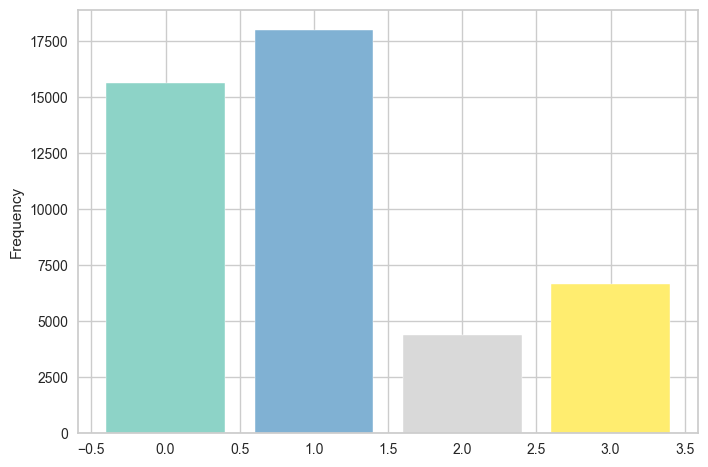

In [76]:

K = 4

kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters = kmeans.fit_predict(df_quanti)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

### PCA visualisation of the K-means

In [102]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(df_quanti)

pca = PCA()
X_pca = pca.fit(X_scaled).transform(X_scaled)

In [108]:
def plot_pca(axe1, axe2, title,y,pca=pca, X_pca=X_pca, cmap=cmap, figsize=(9,6)):
    axe1, axe2 = axe1-1, axe2-1
    fig,ax = plt.subplots(1,1,figsize=figsize)
    # ax.scatter(X_pca[:,axe1], X_pca[:,axe2], c=y, cmap=cmap, s=5)
    ax.set_xlabel(f"PCA component {axe1+1:d} ({pca.explained_variance_ratio_[axe1]:.2%})")
    ax.set_ylabel(f"PCA component {axe2+1:d} ({pca.explained_variance_ratio_[axe2]:.2%})")
    unique_classes = np.unique(y)
    
    for i, clss in enumerate(unique_classes):
        mask = y==clss
        ax.scatter(X_pca[mask, axe1], X_pca[mask, axe2], color = cmap.colors[i], label=f"Cluster {i}", s=5)
    ax.set_title(title)
    ax.legend(markerscale=3)
    return fig,ax

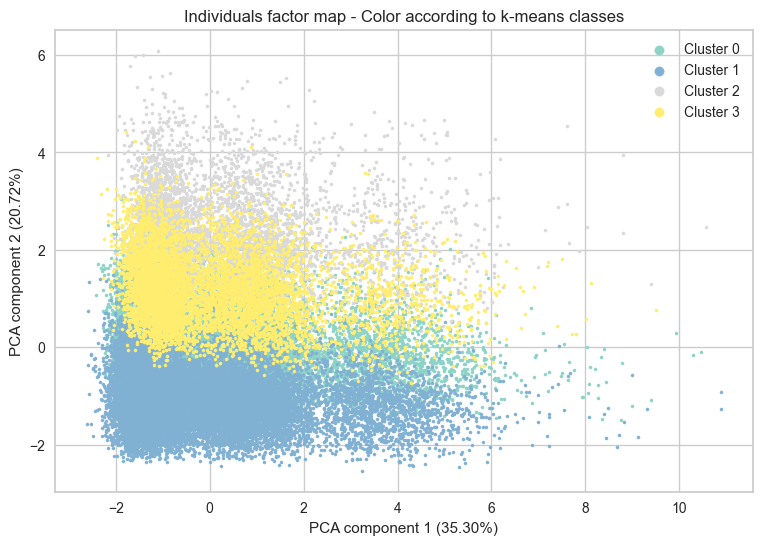

In [109]:
plot_pca(1, 2, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

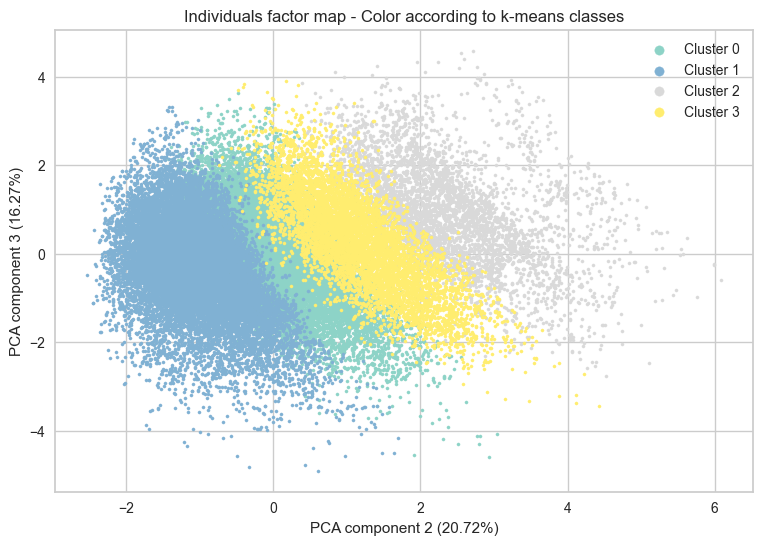

In [112]:
plot_pca(2,3, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

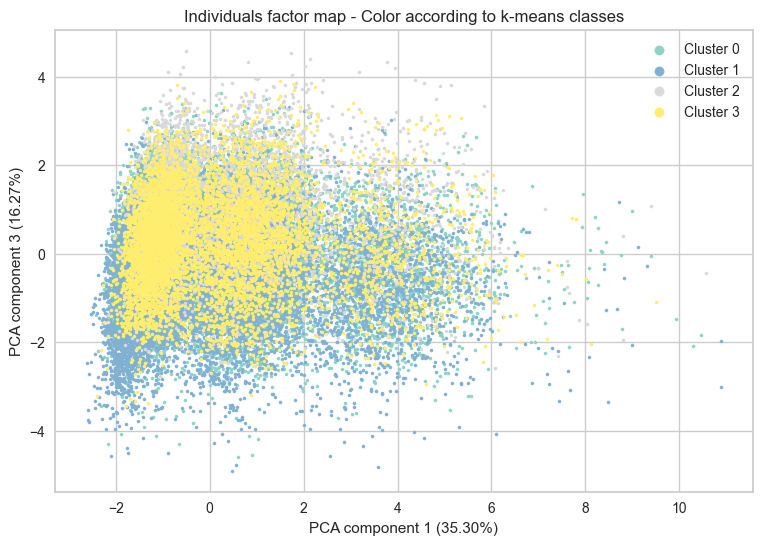

In [113]:
plot_pca(1,3,"Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

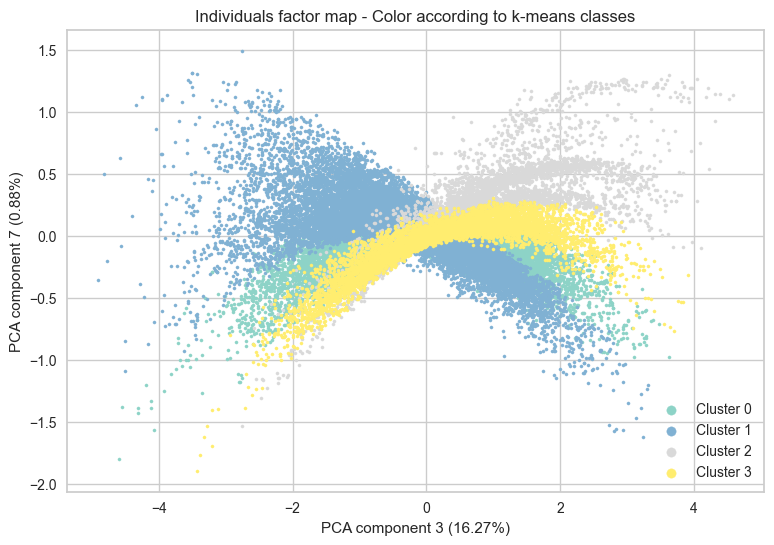

In [114]:
plot_pca(3,7, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

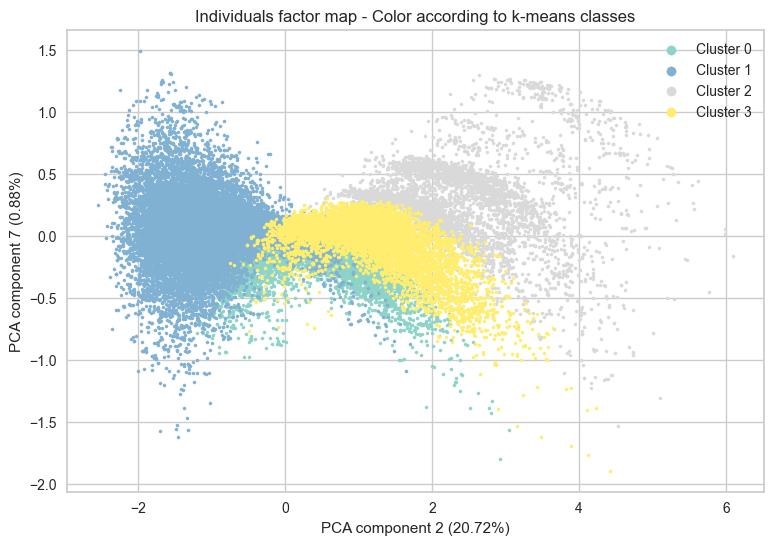

In [115]:
plot_pca(2,7, "Individuals factor map - Color according to k-means classes", y= clusters)
plt.show()

**Comment:** We get the best separation of class in the PCA space for the principal components 2, 3, and 7, capturing respectively $20.72$, $16.27$, and $0.88$ % of the explained variance. We will look into the composition of these variables to better understand the clusters created by K-means.

Comparing the graphs obtained from plotting along the different principal components, we see that the best separation occurs when plotting along the 2nd and 3rd. We name $\mathcal{X}$ the space created by these two principal components.
The observed cluster frontiers are all situated ortogonally to the diagonal of $\mathcal{X}$. Moving diagonally in $\mathcal{X}$, we are able to switch clusters. Exiting a cluster, we are almost sure to a certain noise induced probability of never returning, when moving along the diagonal axis. This would indicate that there exists a linear function in $\mathcal{X}$ that explains the clusters.

Similarily, naming $\mathcal{Z}$ the space created by the 3rd and 7th principal components, there seems to exist a second degree polynomial that wholly describes each cluster, with varying width and argmax. However, noting the more straight forward separation observed in $\mathcal{X}$, we keep our analysis focused on this space only.

In [116]:
df_pca_comp = pd.DataFrame(pca.components_, columns=np.arange(1, pca.components_.shape[1]+1), index=df_quanti.columns)
print("".join([f"PCA {i+1}: {v:.2%}, " for i,v in enumerate(pca.explained_variance_ratio_)]))
print("----")
pd.set_option('display.width', 1000)
# styled_df = df.style.set_properties(subset=['col1', 'col2'], **{'background-color': 'yellow'})
df_pca_comp.style.set_properties(subset=[2,3,7], **{"background-color": "yellow"})

PCA 1: 35.30%, PCA 2: 20.72%, PCA 3: 16.27%, PCA 4: 12.02%, PCA 5: 11.74%, PCA 6: 2.44%, PCA 7: 0.88%, PCA 8: 0.63%, 
----


**Comment:** The 2nd principal component, hereby noted $\mu_2$, is the most correlated with the $age$, $cred_hist$, and $income$ (expressed logarithmically) variables. The 3rd principal component, hereby noted $\mu_3$, is the most correlated with the *emp_exp*, *amnt*, *percentage*, and *score* variables.

$\mu_2$ increases when the age of an individual increases, and decreases as the length of an individuals credit history or income increases. It seems to represent *older, low income loan demanders with a short credit history*. It's opposite: $-\mu_2$ could represent *younger, high income loan demanders with a long credit history*. Typically, such a principal component could be used to separate *more privileged* loan demanders (high $\mu_2$) from *less privileged* loan demanders, typically people having experienced financial troubles, immigrants, etc., (low $\mu_2$).

$\mu_3$ increases when a loan demander's employment experience, loan amount, and credit score increases. It decreases when the percentage amount of income increases. This negative correlation could potentially be extended; implying a positive correlation with the loan demander's income, given the nature of *percentage*: $\begin{equation} percentage = \frac{amount}{income} \end{equation}$.

The $\mu_3$ principal component seems to represent *high credit, long work experience loan demanders asking for high, but reasonable loan amounts*. This principal component captures the "ideal debitor": financially mature, reasonable, and asking for a high loan amount.

**Conclusion:** It seems, based on the observations and our hypotheses, that the 4 cluster K-means algorithm has divided the population into clusters depending on their level of privilege ($\mu_2$) and their correspondance with the profile of an ideal debitor ($\mu_3$). 

To test this hypothesis, we can plot the contingency table of our clusters and the *status* variable. If we're correct, then cluster with the most '1's should be 2, then 3, then 0, and then 1, as these score high on the $\mu_3$ principal component, which captures the likelyness to an ideal debitor. However, we see the same when it comes to high $\mu_2$ values, which could be disfavorable for obtaining a loan. Nevertheless, we keep our initial hypothesis, and try to test it.

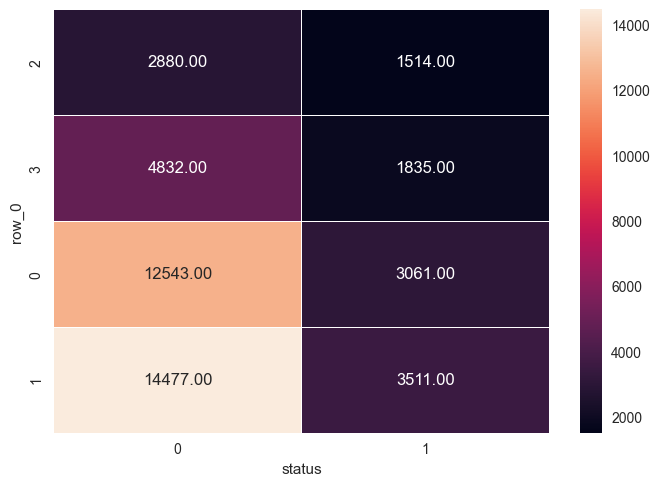

In [117]:
test_interpret = pd.crosstab(clusters, df_clean['status'])
test_interpret = test_interpret.loc[[2,3,0,1]]
sns.heatmap(test_interpret, annot=True, fmt='.2f',linewidths=0.5)
plt.show()

**Ending comment:** What we end up observing, is that the order of clusters proposed did not match the clusters with a high amount of 'yes's, but rather an inverse relationship: a low number of 'no's. Our interpretations of the principal components are thus not necessarily false, but they would need tuning if we were to use clustering to preprocess and structure actual loan data.

### LDA visualisation of the K-means 

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = clusters
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)

In [122]:
def plot_lda(axe1, axe2, title, y, lda=lda, X_lda=X_lda, cmap=cmap, figsize=(9,6)):
    axe1, axe2 = axe1-1, axe2-1
    fig,ax = plt.subplots(1,1,figsize=figsize)
    ax.scatter(X_lda[:,axe1], X_lda[:,axe2], c=y, cmap=cmap, s=5)
    ax.set_xlabel(f"LDA component {axe1+1:d} ({lda.explained_variance_ratio_[axe1]:.2%})")
    ax.set_ylabel(f"LDA component {axe2+1:d} ({lda.explained_variance_ratio_[axe2]:.2%})")
    unique_classes = np.unique(y)
    
    for i, clss in enumerate(unique_classes):
        mask = y==clss
        # compute centroids in lda space
        centroid = np.mean(X_lda[mask], axis=0)
        ax.scatter(centroid[0], centroid[1], marker="X", color=cmap.colors[i], edgecolor="black", label=f"Cluster {i}")
    ax.set_title(title)
    ax.legend(markerscale=3)
    return fig,ax

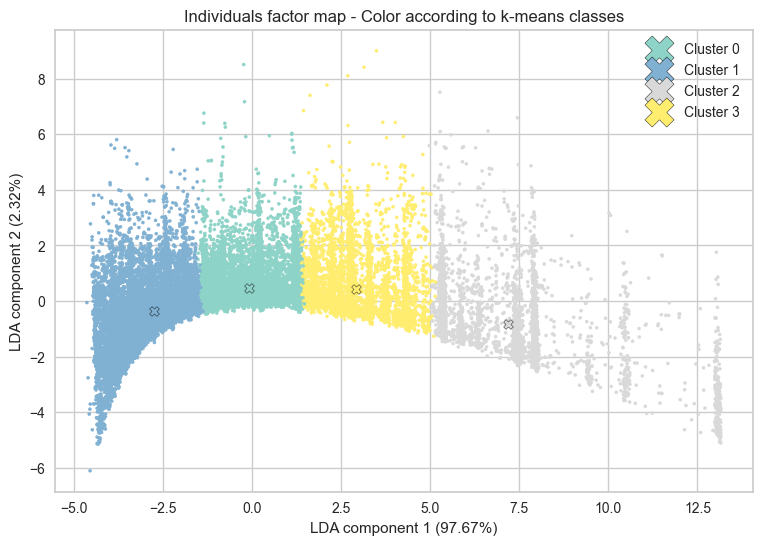

In [123]:
plot_lda(1,2, "Individuals factor map - Color according to k-means classes", clusters)
plt.show()

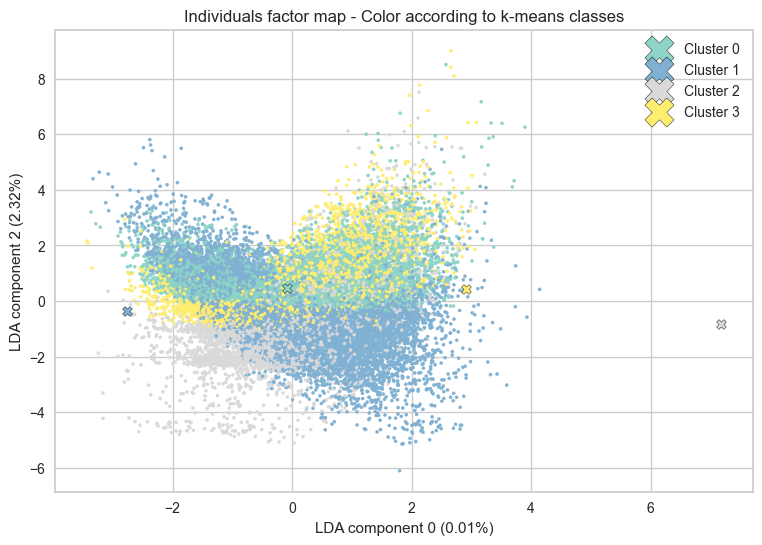

In [124]:
plot_lda(0,2,"Individuals factor map - Color according to k-means classes", clusters)
plt.show()

In [125]:
df_lda_comp = pd.DataFrame(lda.scalings_, columns=np.arange(1,lda.scalings_.shape[1]+1), index=df_quanti.columns)
print("".join([f"LDA {i+1}: {v:.2%}, " for i,v in enumerate(lda.explained_variance_ratio_)]))
print("----")
print(df_lda_comp)

LDA 1: 97.67%, LDA 2: 2.32%, LDA 3: 0.01%, 
----
                   1         2         3
age        -0.033582 -0.024687 -0.177663
emp_exp     0.041981  0.057675  0.147061
amnt        3.254798 -2.351074 -0.047057
rate        0.038801 -0.091226  0.610109
percentage -0.032059  2.544385  0.317835
cred_hist  -0.004500 -0.052343  0.011358
score      -0.002549 -0.017944 -0.128958
Lincome    -0.034648  1.988732 -0.557663


**Comment:** By analysing the LDA components we get a better idea of how the K-means clusters have been constructed. The first LDA axis, which explains $97.67$ % of the variance, is mostly composed of the *amnt* variable, corresponding to the amount of money borrowed. The second LDA axis, accounting for $2.32$ % of the explained variance, is mostly composed of the *amnt*, *percentage* and *income* variables. These variables correspond to resepectively, the amount borrow, how much this represents of the annual income, and the annual income (expressed as a logarithm) of the individual. 

It seems the K-means algorithm has constructed it's 4 clusters mostly based on the amount borrowed, while also taking into account the stress this would put on the individual.

### Choice of number of classes

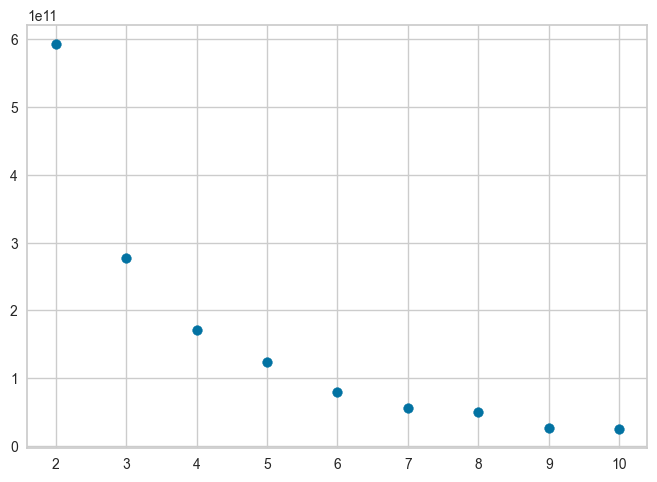

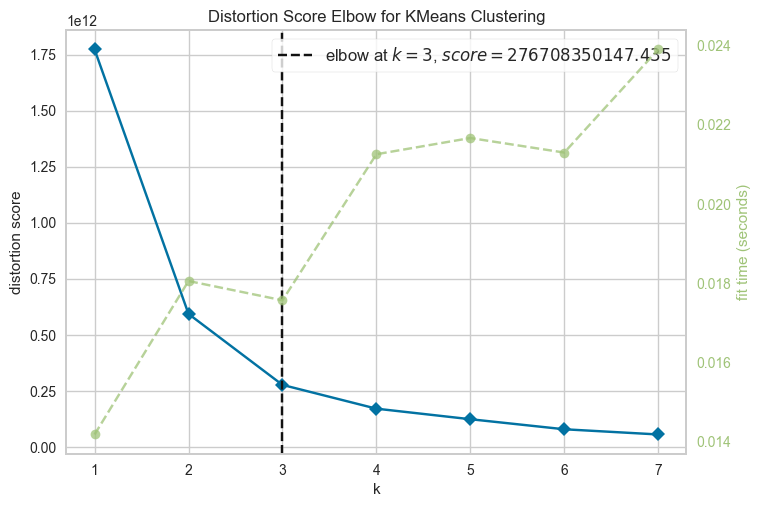

<Figure size 800x550 with 0 Axes>

In [126]:
# By hand

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(df_quanti)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.scatter(range(2, 11), inertia[1:])
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,8))

visualizer.fit(df_quanti)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

plt.savefig("yellowbrick_kmeans.jpg") #<--- maybe add this

**Comment**: The score elbow criteria suggests 3 classes.

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_quanti)

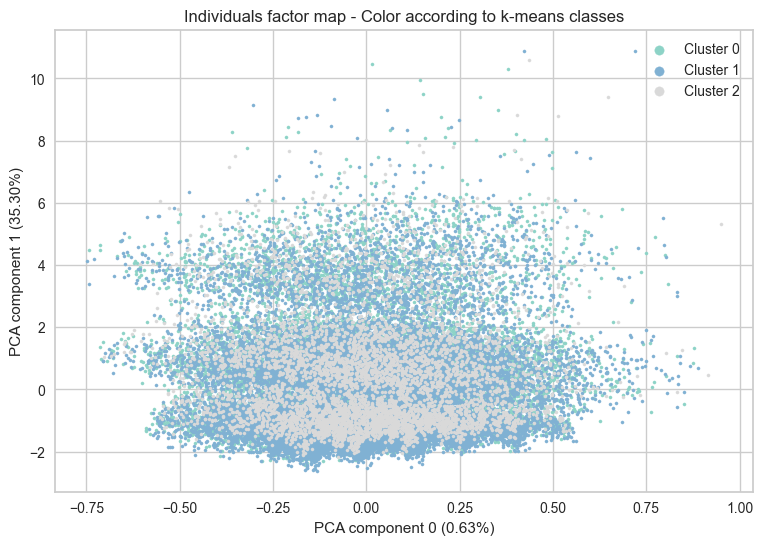

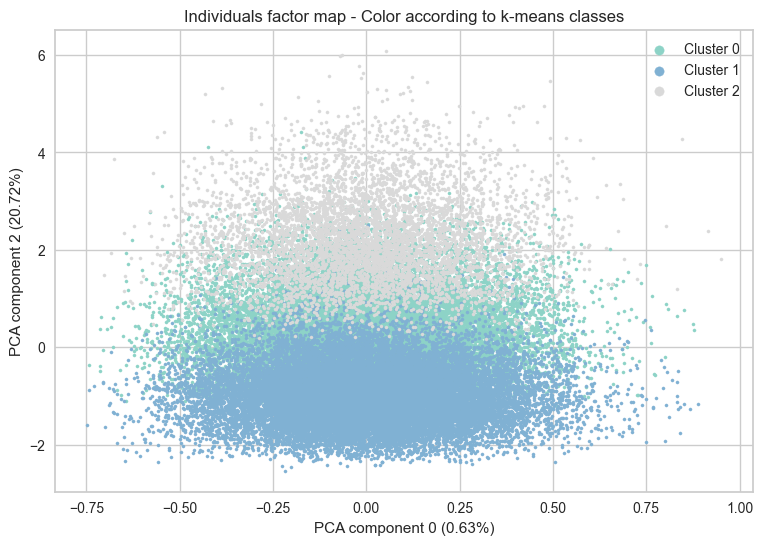

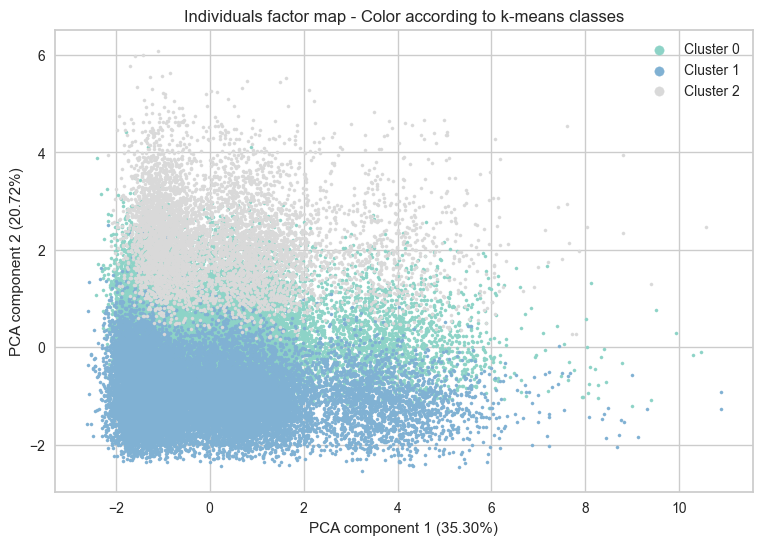

In [129]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm

cmap = plt.get_cmap("Set3", K)  # Choose a colormap with K clusters
colors = [cmap(i/K) for i in range(K)]  # Generate distinct colors
K = 3

kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_kmeans = kmeans.fit_predict(df_quanti)

plot_pca(0,1,"Individuals factor map - Color according to k-means classes", y=clusters_kmeans)
plot_pca(0,2,"Individuals factor map - Color according to k-means classes", y=clusters_kmeans)
plot_pca(1,2,"Individuals factor map - Color according to k-means classes", y=clusters_kmeans)
plt.show()

In [133]:
df_pca_comp = pd.DataFrame(pca.components_, columns=np.arange(1, pca.components_.shape[1]+1), index=df_quanti.columns)
print("".join([f"PCA {i+1}: {v:.2%}, " for i,v in enumerate(pca.explained_variance_ratio_)]))
print("----")
pd.set_option('display.width', 1000)
df_pca_comp.style

PCA 1: 35.30%, PCA 2: 20.72%, PCA 3: 16.27%, PCA 4: 12.02%, PCA 5: 11.74%, PCA 6: 2.44%, PCA 7: 0.88%, PCA 8: 0.63%, 
----


**Comment**: The 3 K-means classes are well seperated in PCA space when plotting against the 2nd principal component. This component is mostly correlated to the income, credit history, and age of the individuals.

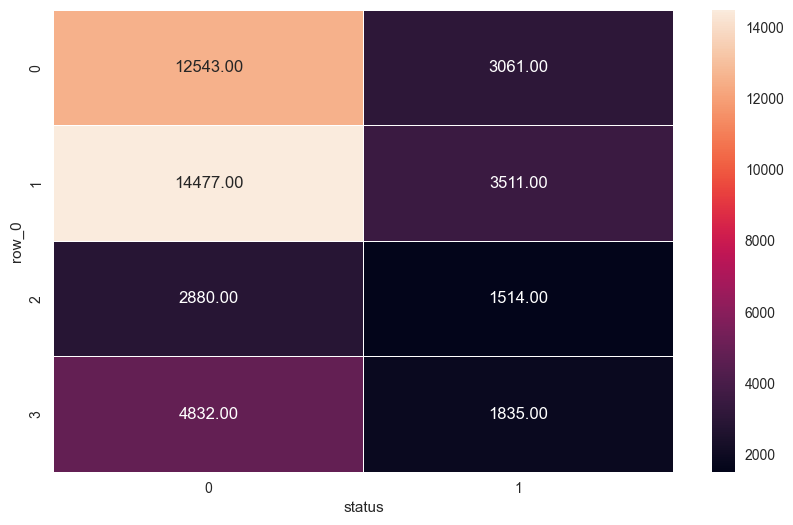

In [135]:
cluster_status = pd.crosstab(clusters, df_quali['status'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_status, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

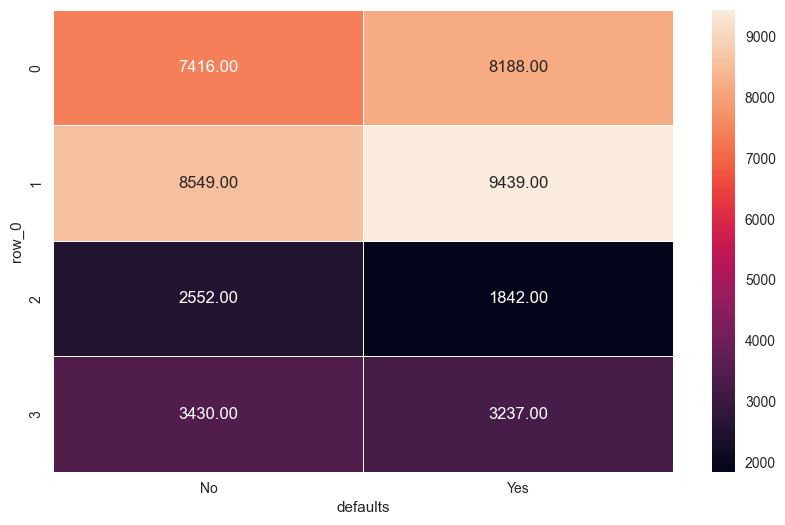

In [137]:
cluster_defaults = pd.crosstab(clusters, df_quali['defaults'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_defaults, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

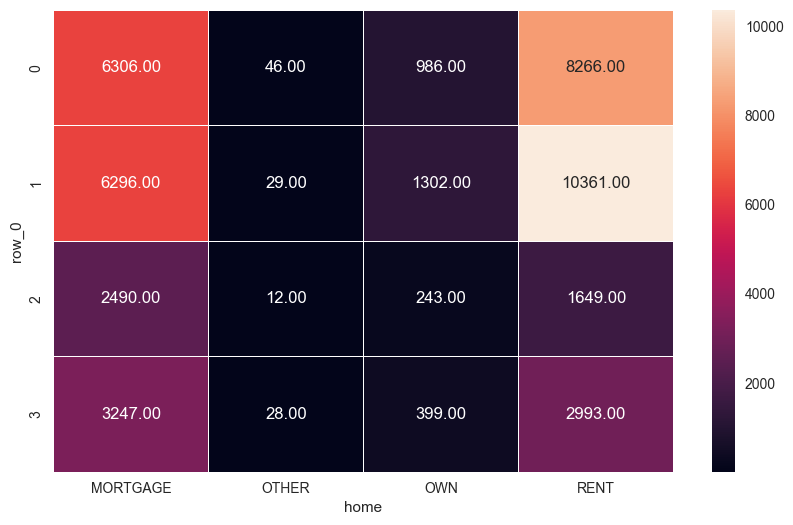

In [138]:
cluster_home = pd.crosstab(clusters, df_quali['home'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_home, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

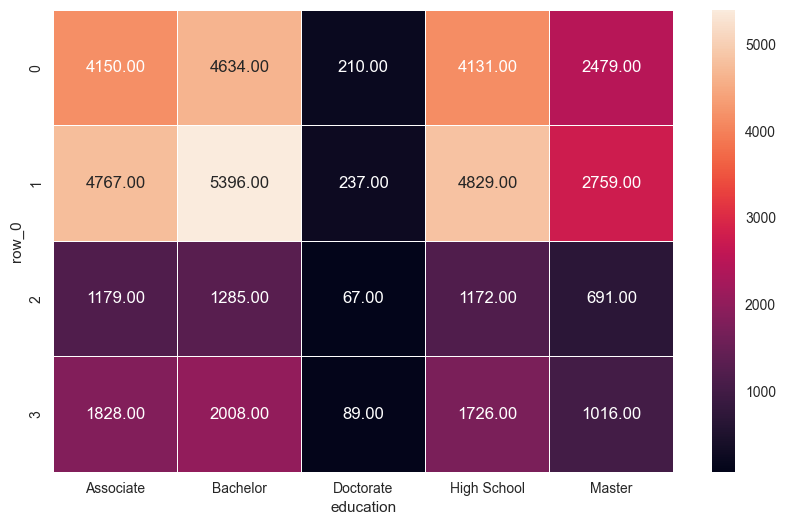

In [136]:
cluster_education = pd.crosstab(clusters, df_quali['education'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_education, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

**Comment**: I do not observe any link between the classes and the categorical variables

## Agglomerative Clustering

In [139]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(1,6))

visualizer.fit(df_quanti)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

In [ ]:
K = 3

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit(df_quanti)

# children = ac.children_
# distances = ac.distances_
# n_observations = np.arange(2, children.shape[0]+2)
# linkage_matrix = np.c_[children, distances, n_observations]

# sch.dendrogram(linkage_matrix, labels=ac.labels_)

# # Cutting the dendrogram to get K classes
# max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
# plt.axhline(y=max_d, c='k')

# plt.title("Dendrogram with Ward linkage")
# plt.show()

In [ ]:

fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[:,0],X_pca[:,1],c= clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],c=clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],c=clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

## Gaussien Mixture Model

In [ ]:
def plotGMM(gmm, data, n_clusters=6):
    gmm.fit(data)
    clusters_gmm = gmm.predict(data)
    
    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', n_clusters)
    
    # plot the input data
    ax.scatter(data[:, 0], data[:, 1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
    
    # w_factor = 0.2 / gmm.weights_.max()
    for i in range(n_clusters):
        mean = gmm.means_[i,:2]
        covariance = gmm.covariances_[i,:2,:2]
        w = gmm.weights_[i]
        draw_ellipse(mean, covariance, w, ax, cmap.colors[i])

In [ ]:
from sklearn.mixture import GaussianMixture

K = 3

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm = gmm.fit_predict(df_quanti)

# --- #
fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[:,0],X_pca[:,1],c= clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


# patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

## Commparing Kmean vs GMM

In [ ]:
def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(clusters_gmm, clusters_kmeans)).plot()

plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')
plt.show()

# --- #

cm, clusters_kmeans_sorted = matchClasses(clusters_gmm, clusters_kmeans)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')
plt.show()

In [ ]:
kmeans_gmm = pd.crosstab(clusters_kmeans, clusters_gmm)
ca = prince.CA(n_components=2)
ca = ca.fit(kmeans_gmm)


In [ ]:
# Get row (true labels) and column (predicted clusters) coordinates
row_coords = ca.row_coordinates(kmeans_gmm)
col_coords = ca.column_coordinates(kmeans_gmm)

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot row points (GMM Clusters)
ax.scatter(row_coords[0], row_coords[1], color='blue', label="GMM Clusters", marker="o")

# Plot column points (K-Means Clusters)
ax.scatter(col_coords[0], col_coords[1], color='red', label="K-Means Clusters", marker="s")

# Add text labels for row points (GMM)
for i, txt in enumerate(kmeans_gmm.index):
    ax.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], str(txt), fontsize=12, color='blue')

# Add text labels for column points (K-Means)
for i, txt in enumerate(kmeans_gmm.columns):
    ax.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], str(txt), fontsize=12, color='red')

# Formatting
ax.axhline(0, color='black', linewidth=0.5, linestyle="dashed")
ax.axvline(0, color='black', linewidth=0.5, linestyle="dashed")
ax.set_xlabel(f"Dim 1 ({np.round(ca.percentage_of_variance_[0]*100, 2)}%)")
ax.set_ylabel(f"Dim 2 ({np.round(ca.percentage_of_variance_[1]*100, 2)}%)")
ax.set_title("CA Factor Map: Comparing GMM and K-Means Clusters")
ax.legend()
plt.grid(True)

# Show plot
plt.show()
